# Chargement données SS Outliers

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import scipy.stats as st
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import pprint
from tabulate import tabulate
import sys
from itertools import combinations 
from scipy import spatial
from sklearn.linear_model import LinearRegression
from scipy import stats
sns.set()

data = pd.read_csv("donneeSsOuliers.csv", sep='\t')
data = data.drop(columns="Unnamed: 0")
data = data.dropna(subset=['product_name'])
print(type(data))


data = data.dropna(subset=['energy_100g', 'saturated-fat_100g', 'sugars_100g',
                           'fiber_100g', 'proteins_100g', 'sodium_100g'], how="all")

data.shape[0]
data
# dataClean = data.loc[:,'nutriscore_score':'sodium_100g']
# dataClean = dataClean.dropna(how="all")


# data.loc[dataClean.index,'nutriscore_score':'sodium_100g'] =
# data.dropna(subset=['product_name'], how="all")

<class 'pandas.core.frame.DataFrame'>


,product_name,nutriscore_score,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g
0,Vitória crackers,NaN,1569.0,3.08,15.0,NaN,7.8,0.560000
3,moutarde au moût de raisin,18.0,936.0,2.20,22.0,0.0,5.1,1.811024
5,Sauce Sweety chili 0%,NaN,88.0,0.00,0.4,NaN,0.2,0.816000
6,Mini coco,NaN,251.0,1.00,3.0,NaN,2.0,0.460000
10,Sachet calisson,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...
1113270,Riz parfumé,0.0,1469.0,0.00,0.0,NaN,7.0,0.000000
1113273,Boules,NaN,1556.0,1.30,54.0,NaN,6.3,0.008000
1113274,Minis beignets,15.0,1393.0,6.00,10.4,NaN,7.4,0.440000
1113275,Erdbeerkuchen 1019g tiefgefroren,12.0,925.0,4.80,24.0,NaN,2.6,0.112000


## Decomposition "data" en dataTrain et dataTest 

In [2]:
colTarget=['nutriscore_score']
colfit = ["energy_100g","saturated-fat_100g","sugars_100g","fiber_100g","proteins_100g","sodium_100g"]
colAll =colTarget + colfit
dataCompletes = data.dropna(subset=colAll).loc[:,colAll]

dataScaledNutri = dataCompletes.loc[:, colfit]
targetNutri = dataCompletes.loc[:,colTarget]

dataXtrain, dataXtest, dataYtrain, dataYtest = train_test_split(dataScaledNutri, targetNutri, train_size=0.8)

dataTrain = data.copy()
dataTest = data.copy()
dataTrain = data.dropna(subset=colAll).drop(dataXtest.index.tolist())
dataTest  = data.dropna(subset=colAll).drop(dataXtrain.index.tolist())


dataTrain.to_csv('dataTrain.csv', sep='\t', encoding='utf-8')
dataTest.to_csv('dataTest.csv', sep='\t', encoding='utf-8')
dataTrain


,product_name,nutriscore_score,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g
3,moutarde au moût de raisin,18.0,936.0,2.20,22.00,0.00,5.10,1.811024
19,Tarte noix de coco,14.0,1594.0,15.50,21.90,4.40,4.60,0.040000
27,Compote de poire,-2.0,657.0,0.00,27.00,3.60,0.60,0.000000
60,BAguette bressan,-4.0,669.0,0.50,0.60,1.60,9.50,0.143200
255,Cranberries,3.0,1255.0,0.00,66.67,10.00,0.00,0.000000
...,...,...,...,...,...,...,...,...
1112924,fibre 5 fruits secs,10.0,1390.0,3.24,21.20,7.65,7.65,0.388000
1112942,Noisettes,-4.0,2629.0,4.46,4.34,9.70,14.95,0.000000
1113044,Deli'light fromage blanc saveur vanille 0%,-2.0,318.0,0.00,11.70,0.00,7.10,0.040000
1113214,Spécial k test pau,-6.0,4.0,1.00,3.00,5.30,8.90,0.400000


## Normalise dataXTrain en dataScaled
fit ls variables sauf nutri score en standart

In [3]:
scaler = StandardScaler()
scaler.fit(dataXtrain)

dataScaled = data.drop(dataXtest.index)

dataScaled.loc[:, "energy_100g":"sodium_100g"]=scaler.transform(dataScaled.loc[:, "energy_100g":"sodium_100g"])


In [4]:
dataScaled

,product_name,nutriscore_score,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g
0,Vitória crackers,NaN,0.585365,-0.198033,0.138163,NaN,-0.000366,0.090800
3,moutarde au moût de raisin,18.0,-0.234327,-0.319826,0.543014,-0.640046,-0.330399,0.811190
5,Sauce Sweety chili 0%,NaN,-1.332430,-0.624309,-0.706238,NaN,-0.929348,0.238215
6,Mini coco,NaN,-1.121356,-0.485908,-0.555865,NaN,-0.709326,0.033216
10,Sachet calisson,NaN,NaN,NaN,NaN,NaN,NaN,-0.231670
...,...,...,...,...,...,...,...,...
1113270,Riz parfumé,0.0,0.455872,-0.624309,-0.729373,NaN,-0.098154,-0.231670
1113273,Boules,NaN,0.568531,-0.444387,2.393757,NaN,-0.183718,-0.227064
1113274,Minis beignets,15.0,0.357457,0.206099,-0.127881,NaN,-0.049260,0.021699
1113275,Erdbeerkuchen 1019g tiefgefroren,12.0,-0.248571,0.040017,0.658685,NaN,-0.635985,-0.167176


# Exploration des données

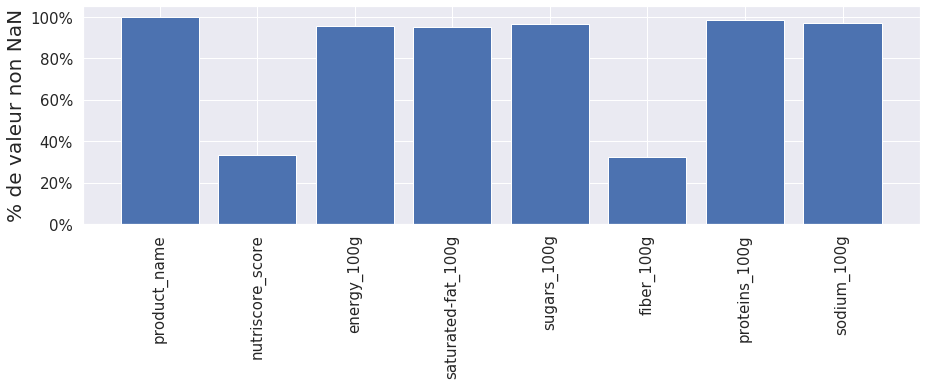

In [5]:
xlabel = dataScaled.columns
fig = plt.figure(figsize=(15, 4))
plot = fig.add_subplot(1, 1, 1)
plt.bar(xlabel, 100*dataScaled.count()/dataScaled.shape[0])
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)


fmt = '%.0f%%'  # Format you want the ticks, e.g. '40%'
xxticks = mtick.FormatStrFormatter(fmt)

# yaxis

plot.yaxis.set_major_formatter(xxticks)

plt.ylabel("% de valeur non NaN", fontsize=20)


plt.show()

# KNN pour l'imputation

In [6]:
def knnData(colTarget, colfit, testSize) : 
    colAll =colfit +  colTarget

    dataScaledTrain = dataScaled.dropna(subset=colAll).loc[:,colAll]

    print("dataScaledTrain.shape[0]", dataScaledTrain.shape[0])
    
    
    
    if dataScaledTrain.shape[0] > 0 : 
        
        dataScaledPredicted = dataScaled.dropna(subset=colfit).loc[:, colfit]
        dataScaledPredicted = dataScaledPredicted.drop(dataScaledTrain.index)

        print("dataScaledPredicted.shape[0]", dataScaledPredicted.shape[0])
        if dataScaledPredicted.shape[0] > 0 :
    
            taille_test = min(testSize, dataScaledTrain.shape[0])

            print(dataScaledTrain.shape[0])
            sample = random.sample(list(dataScaledTrain.index), k=taille_test)
            # sample =list(dataScaledTrain.index)

            dataScaledNutri = dataScaledTrain.loc[sample, colfit]
            targetNutri = dataScaledTrain.loc[sample,colTarget]

            xtrain, xtest, ytrain, ytest = train_test_split(
                dataScaledNutri, targetNutri, train_size=0.8)

            errors = []
            for k in range(2, 20):
                knn = KNeighborsRegressor(k)
                errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
            
            
            fig = plt.figure(figsize=(5, 5))
            plot = fig.add_subplot(1, 1, 1)
            plt.plot(range(2, 20), errors, 'o-')            
            plt.xticks(fontsize=15)
            plt.yticks(fontsize=15)
            
            fmt = '%.0f%%'  # Format you want the ticks, e.g. '40%'
            xxticks = mtick.FormatStrFormatter(fmt)
            plot.yaxis.set_major_formatter(xxticks)
            plt.ylabel(" 1-R2 en % ", fontsize=15)
            
            plt.xlabel("k", fontsize=15)
            plt.show()
            

            print( "hyper parametre k optimal :" , errors.index(min(errors))+2)
            print( "erreur minimale : " , min(errors))


            k = errors.index(min(errors))+2
            knn = KNeighborsRegressor(k)
            knn.fit(xtrain, ytrain)

            fiberPredict = knn.predict(dataScaledPredicted)
            dataScaled.loc[dataScaledPredicted.index, colTarget] = fiberPredict


            xlabel = dataScaled.columns
            fig = plt.figure(figsize=(15, 4))
            plot = fig.add_subplot(1, 1, 1)
            plt.bar(xlabel, 100*dataScaled.count()/dataScaled.shape[0])
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=15)



            fmt = '%.0f%%'  # Format you want the ticks, e.g. '40%'
            xxticks = mtick.FormatStrFormatter(fmt)

            # yaxis

            plot.yaxis.set_major_formatter(xxticks)
            plt.ylabel("% de valeur non NaN", fontsize=15)


            plt.show()

In [7]:
print(dataScaled.dropna(subset=["energy_100g"]).shape[0])
print(dataScaled.shape[0])
print(dataScaled.shape[0] - dataScaled.dropna(subset=["energy_100g"]).shape[0]  - 5257 - 68)

824362
864421
34734


## KNN energy

dataScaledTrain.shape[0] 264486
dataScaledPredicted.shape[0] 5257
264486


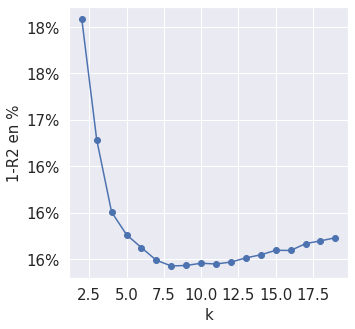

hyper parametre k optimal : 8
erreur minimale :  15.424870614487851


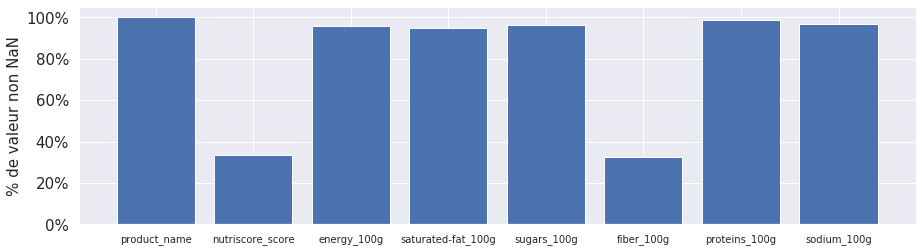

(0, 1, 2, 3)
colfit :  ['saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g']
dataScaledTrain.shape[0] 272137
dataScaledPredicted.shape[0] 68
272137


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


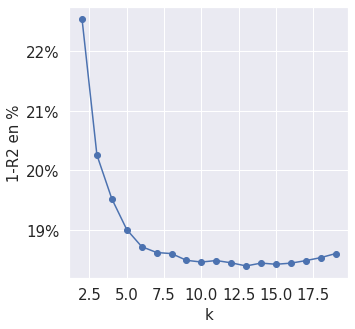

hyper parametre k optimal : 13
erreur minimale :  18.394862584576586


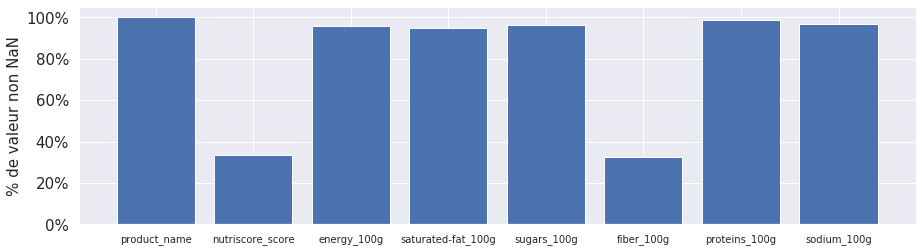

(0, 1, 2, 4)
colfit :  ['saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'sodium_100g']
dataScaledTrain.shape[0] 270159
dataScaledPredicted.shape[0] 34
270159


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


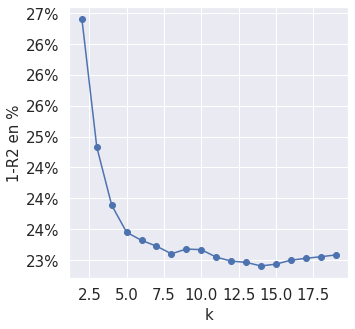

hyper parametre k optimal : 14
erreur minimale :  22.90657764637961


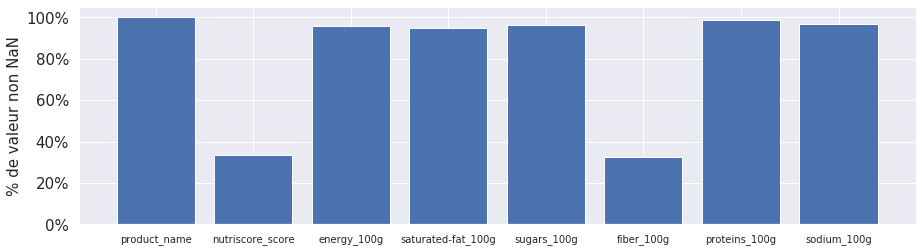

(0, 1, 3, 4)
colfit :  ['saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 779017


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


dataScaledPredicted.shape[0] 13760
779017


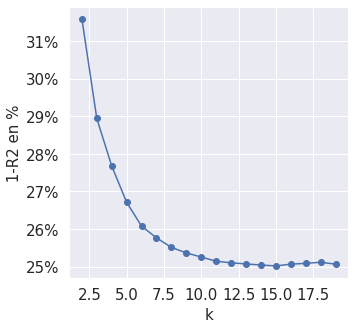

hyper parametre k optimal : 15
erreur minimale :  25.016968868544254


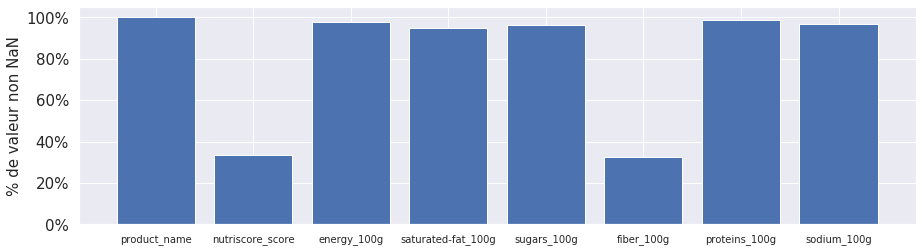

(0, 2, 3, 4)
colfit :  ['saturated-fat_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 271237


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


dataScaledPredicted.shape[0] 99
271237


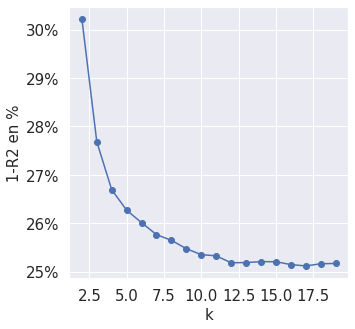

hyper parametre k optimal : 17
erreur minimale :  25.11713742488797


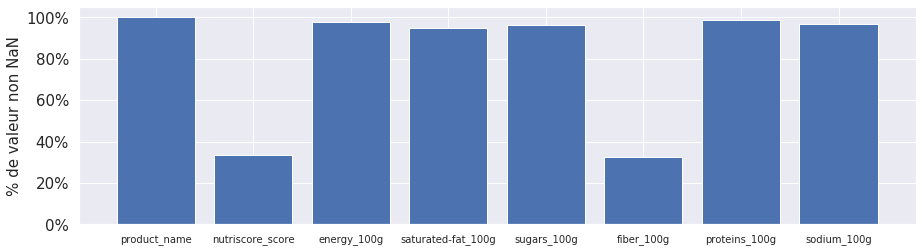

(1, 2, 3, 4)
colfit :  ['sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 273028
dataScaledPredicted.shape[0] 168
273028


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


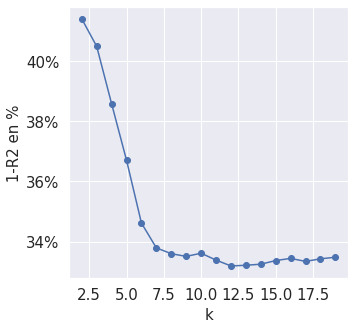

hyper parametre k optimal : 12
erreur minimale :  33.18854726781093


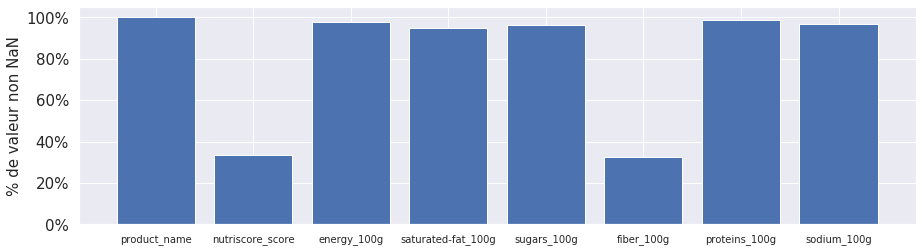

(0, 1, 2)
colfit :  ['saturated-fat_100g', 'sugars_100g', 'fiber_100g']
dataScaledTrain.shape[0] 272711
dataScaledPredicted.shape[0] 8
272711


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


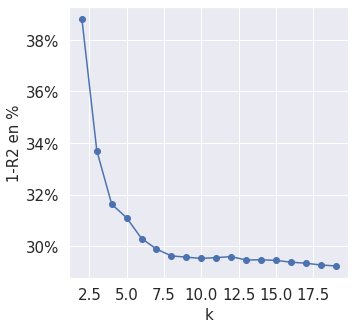

hyper parametre k optimal : 19
erreur minimale :  29.23219643959435


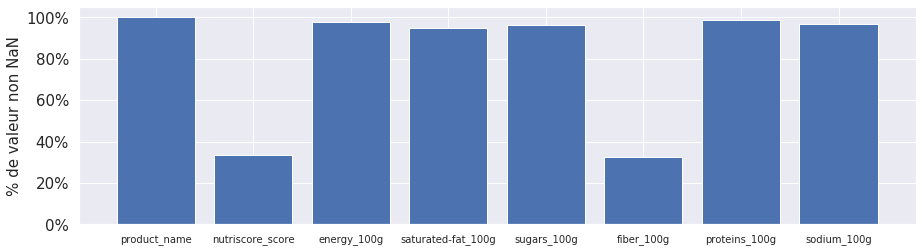

(0, 1, 3)
colfit :  ['saturated-fat_100g', 'sugars_100g', 'proteins_100g']
dataScaledTrain.shape[0] 806809


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 3552
806809


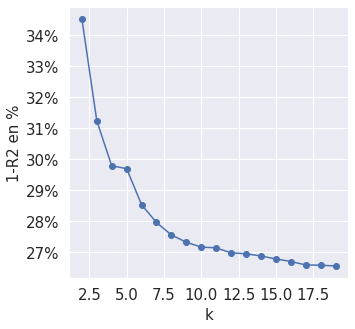

hyper parametre k optimal : 19
erreur minimale :  26.56215198821956


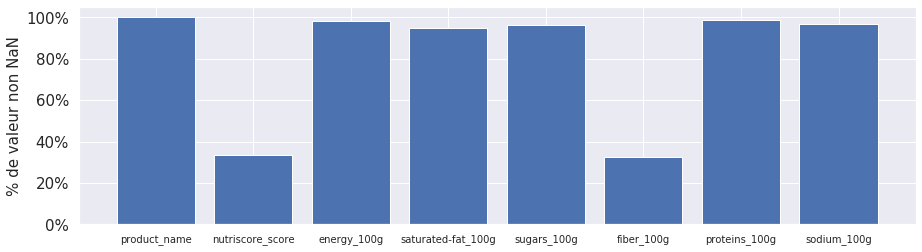

(0, 1, 4)
colfit :  ['saturated-fat_100g', 'sugars_100g', 'sodium_100g']
dataScaledTrain.shape[0] 793639


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 47
793639


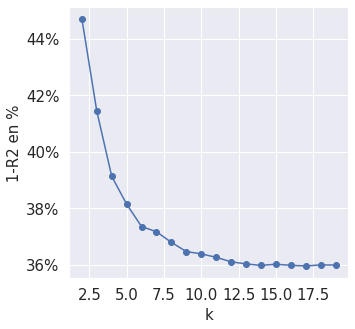

hyper parametre k optimal : 17
erreur minimale :  35.9527978531626


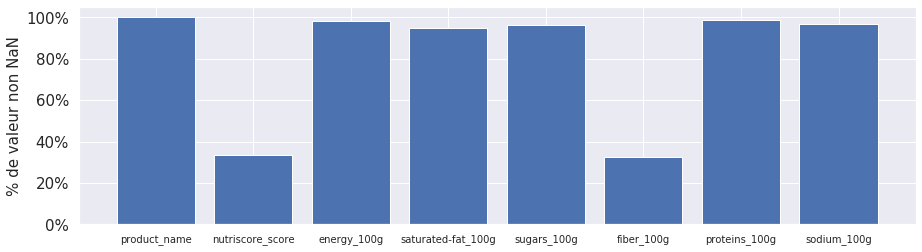

(0, 2, 3)
colfit :  ['saturated-fat_100g', 'fiber_100g', 'proteins_100g']
dataScaledTrain.shape[0] 274019


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 12
274019


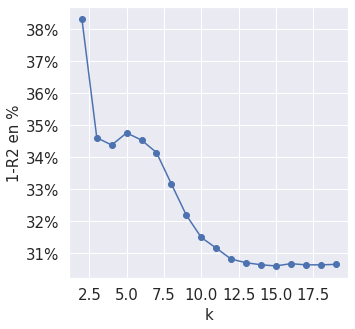

hyper parametre k optimal : 15
erreur minimale :  30.599472726423894


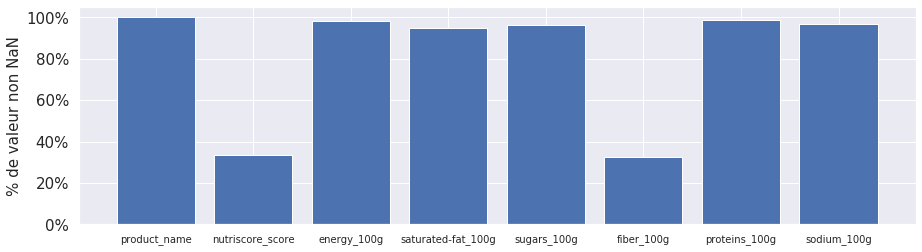

(0, 2, 4)
colfit :  ['saturated-fat_100g', 'fiber_100g', 'sodium_100g']
dataScaledTrain.shape[0] 271830
dataScaledPredicted.shape[0] 162
271830


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


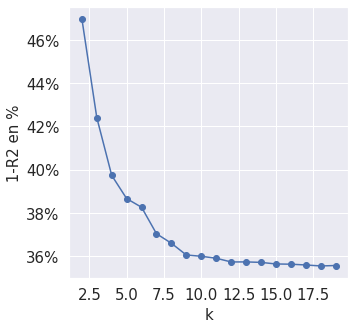

hyper parametre k optimal : 18
erreur minimale :  35.550040022388394


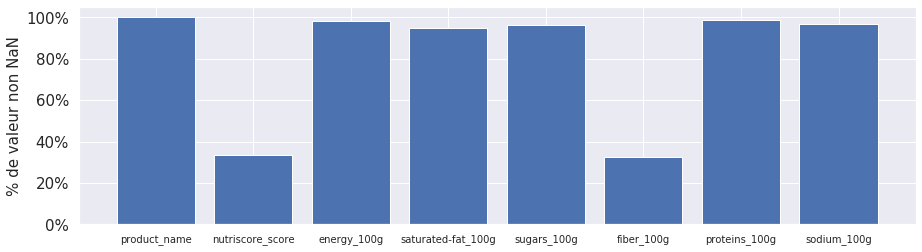

(0, 3, 4)
colfit :  ['saturated-fat_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 799068


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 1116
799068


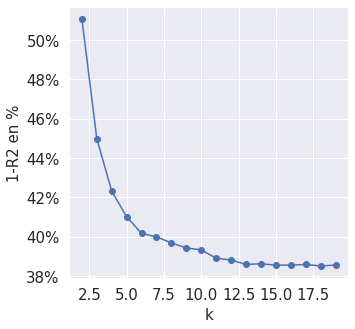

hyper parametre k optimal : 18
erreur minimale :  38.503048506404


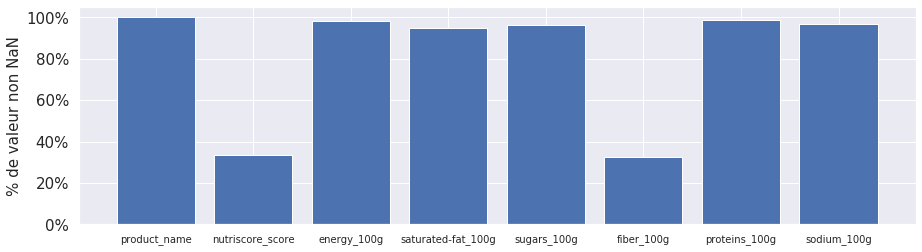

(1, 2, 3)
colfit :  ['sugars_100g', 'fiber_100g', 'proteins_100g']
dataScaledTrain.shape[0] 276101
dataScaledPredicted.shape[0] 18
276101


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


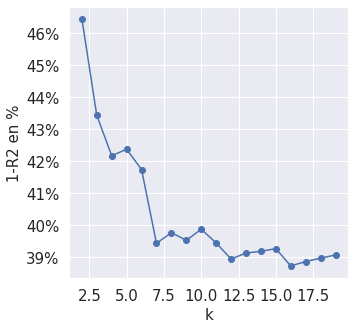

hyper parametre k optimal : 16
erreur minimale :  38.724976858439355


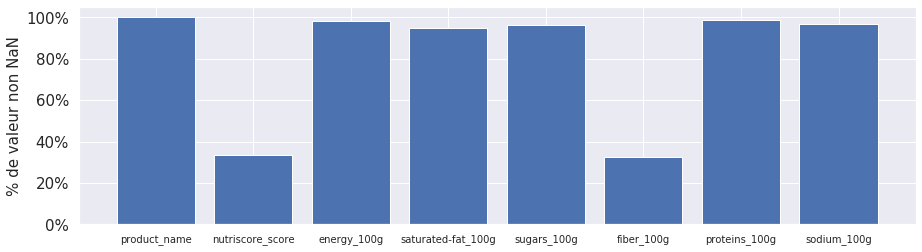

(1, 2, 4)
colfit :  ['sugars_100g', 'fiber_100g', 'sodium_100g']
dataScaledTrain.shape[0] 273705
dataScaledPredicted.shape[0] 7
273705


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


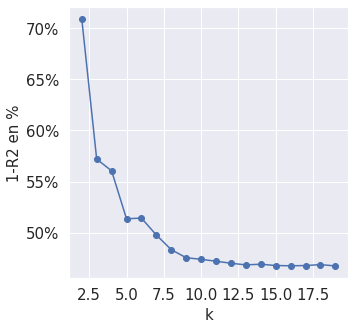

hyper parametre k optimal : 19
erreur minimale :  46.7313482099831


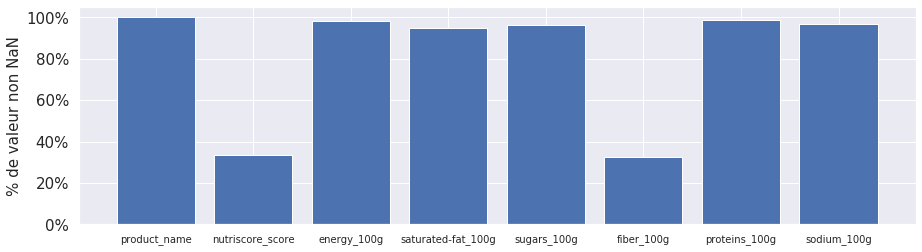

(1, 3, 4)
colfit :  ['sugars_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 810576


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 2915
810576


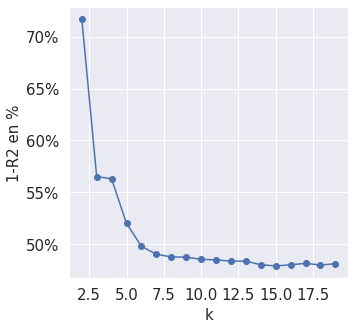

hyper parametre k optimal : 15
erreur minimale :  47.90337586493673


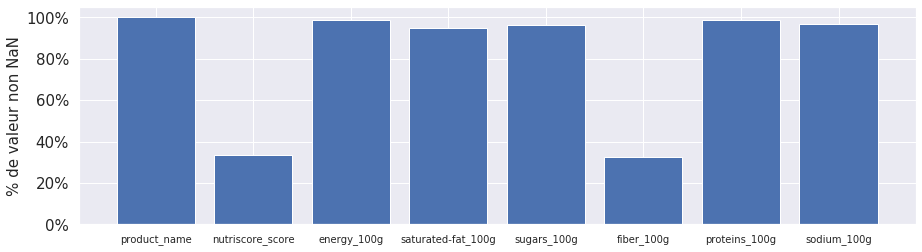

(2, 3, 4)
colfit :  ['fiber_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 275277
dataScaledPredicted.shape[0] 74
275277


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


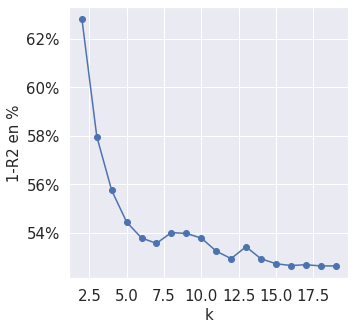

hyper parametre k optimal : 19
erreur minimale :  52.632194633707854


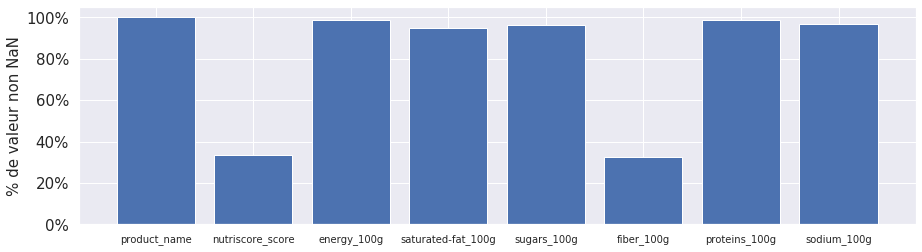

(0, 1)
colfit :  ['saturated-fat_100g', 'sugars_100g']
dataScaledTrain.shape[0] 811456


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 21
811456


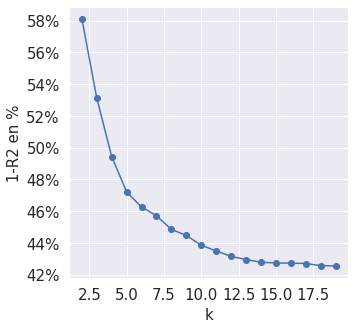

hyper parametre k optimal : 19
erreur minimale :  42.55352946415067


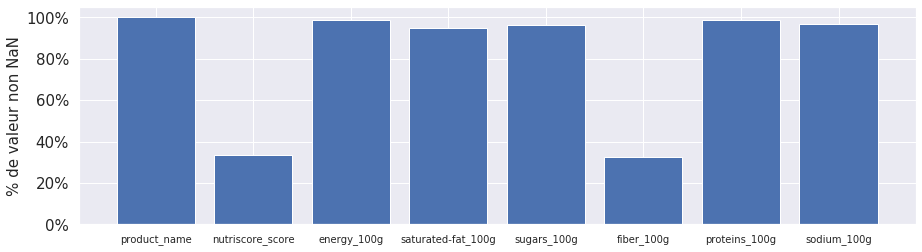

(0, 2)
colfit :  ['saturated-fat_100g', 'fiber_100g']
dataScaledTrain.shape[0] 274762
dataScaledPredicted.shape[0] 3
274762


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


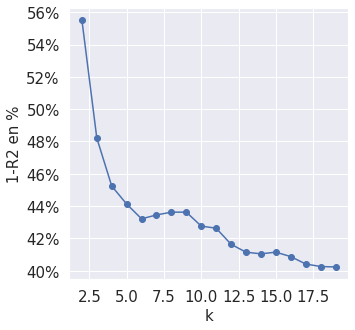

hyper parametre k optimal : 19
erreur minimale :  40.23215344145075


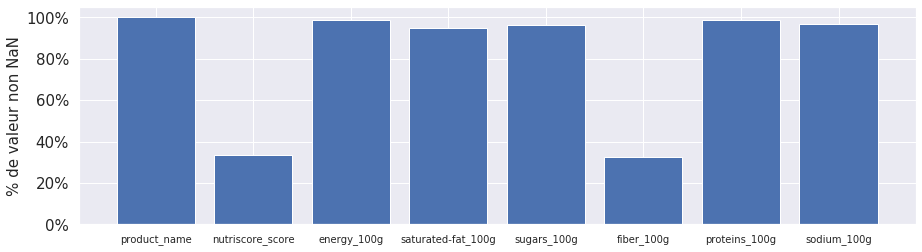

(0, 3)
colfit :  ['saturated-fat_100g', 'proteins_100g']
dataScaledTrain.shape[0] 818473


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 44
818473


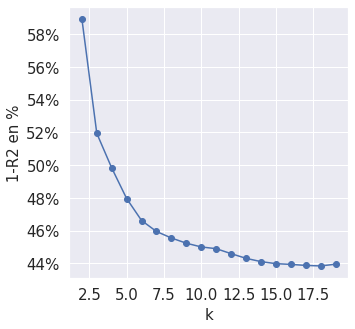

hyper parametre k optimal : 18
erreur minimale :  43.839450308291006


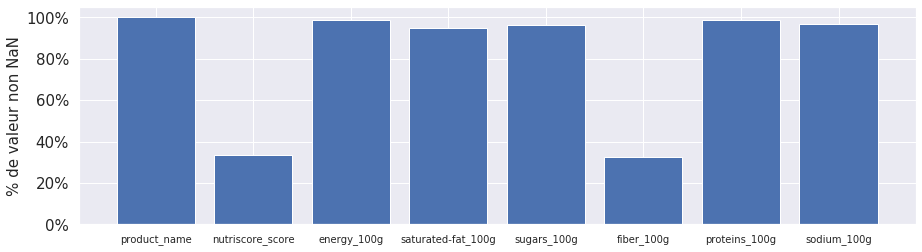

(0, 4)
colfit :  ['saturated-fat_100g', 'sodium_100g']
dataScaledTrain.shape[0] 801408


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 41
801408


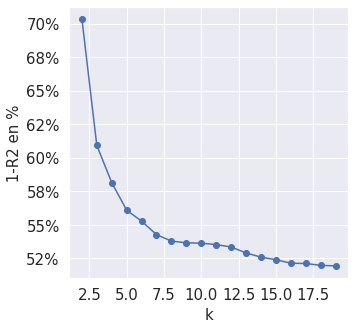

hyper parametre k optimal : 19
erreur minimale :  51.9453783585206


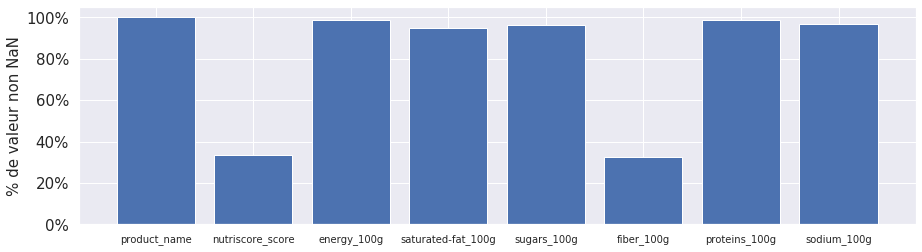

(1, 2)
colfit :  ['sugars_100g', 'fiber_100g']
dataScaledTrain.shape[0] 276765
dataScaledPredicted.shape[0] 5
276765


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


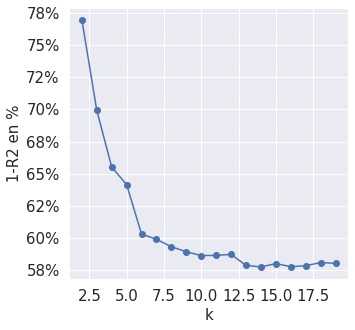

hyper parametre k optimal : 14
erreur minimale :  57.730269522750255


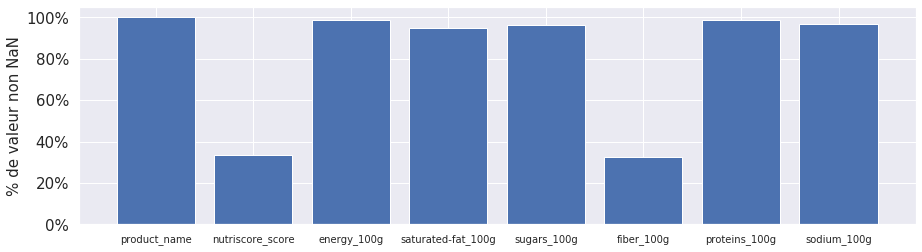

(1, 3)
colfit :  ['sugars_100g', 'proteins_100g']
dataScaledTrain.shape[0] 832107


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 27
832107


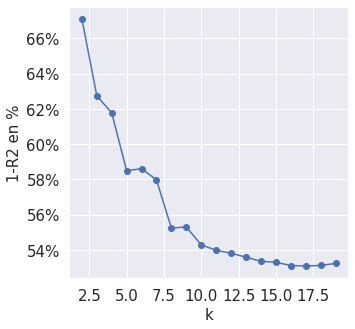

hyper parametre k optimal : 17
erreur minimale :  53.095651485759035


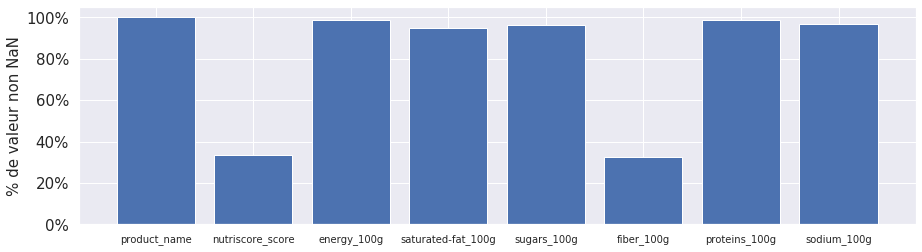

(1, 4)
colfit :  ['sugars_100g', 'sodium_100g']
dataScaledTrain.shape[0] 814750


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 37
814750


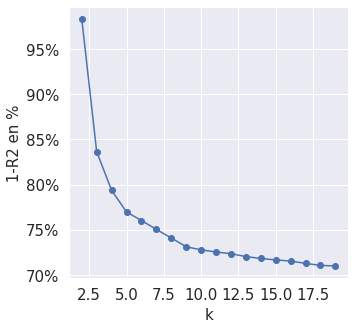

hyper parametre k optimal : 19
erreur minimale :  71.00190380341778


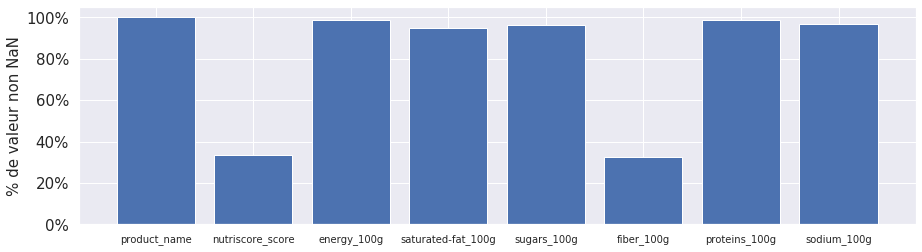

(2, 3)
colfit :  ['fiber_100g', 'proteins_100g']
dataScaledTrain.shape[0] 279164
dataScaledPredicted.shape[0] 17
279164


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


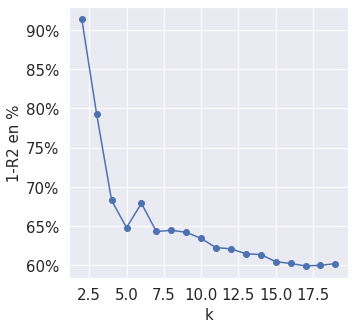

hyper parametre k optimal : 17
erreur minimale :  59.93860393114583


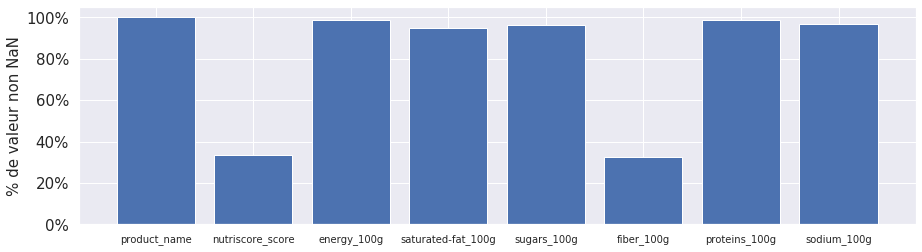

(2, 4)
colfit :  ['fiber_100g', 'sodium_100g']
dataScaledTrain.shape[0] 276089
dataScaledPredicted.shape[0] 8
276089


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


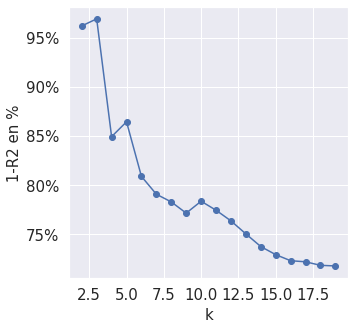

hyper parametre k optimal : 19
erreur minimale :  71.74226214462657


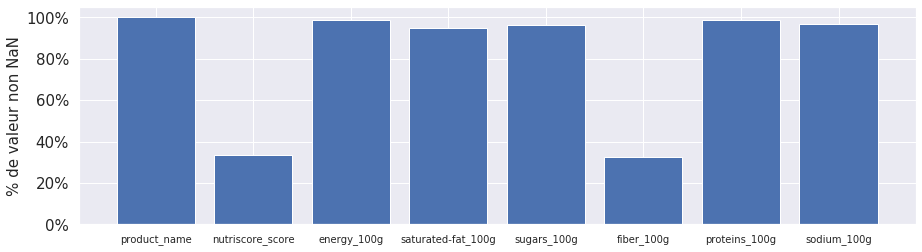

(3, 4)
colfit :  ['proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 823982


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 3467
823982


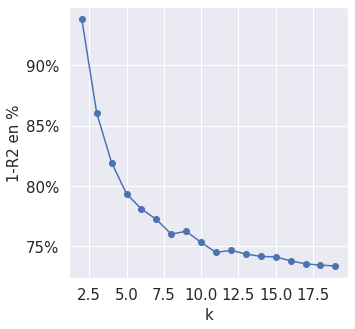

hyper parametre k optimal : 19
erreur minimale :  73.38019315064082


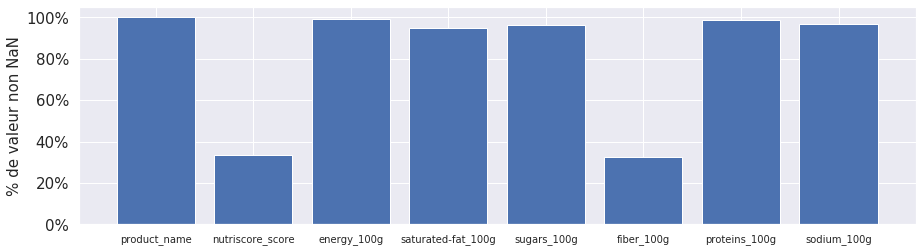

(0,)
colfit :  ['saturated-fat_100g']
dataScaledTrain.shape[0] 820142


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 71
820142


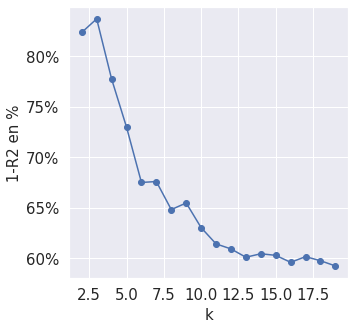

hyper parametre k optimal : 19
erreur minimale :  59.2219562349752


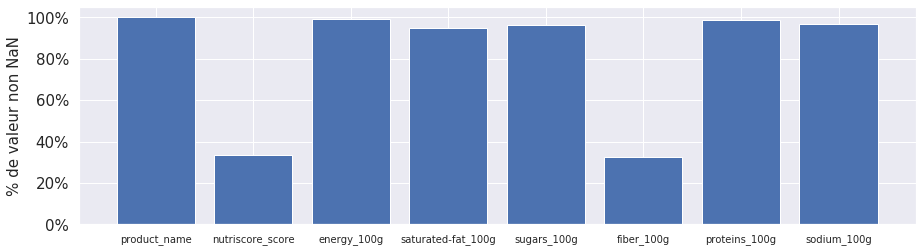

(1,)
colfit :  ['sugars_100g']
dataScaledTrain.shape[0] 834027


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 88
834027


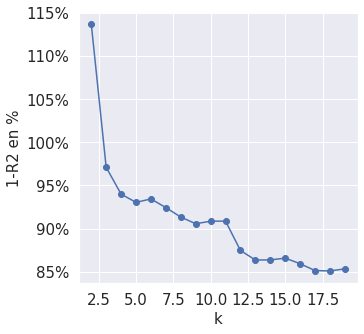

hyper parametre k optimal : 18
erreur minimale :  85.08700807795795


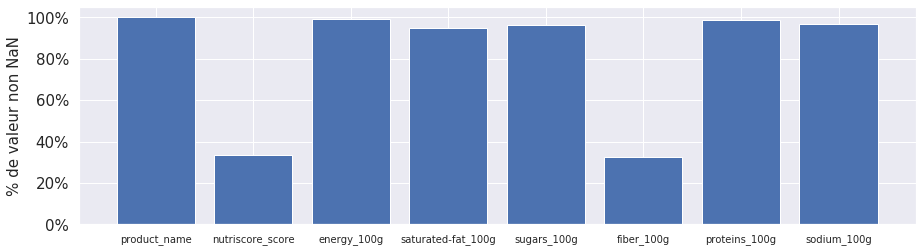

(2,)
colfit :  ['fiber_100g']
dataScaledTrain.shape[0] 280107


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 23
280107


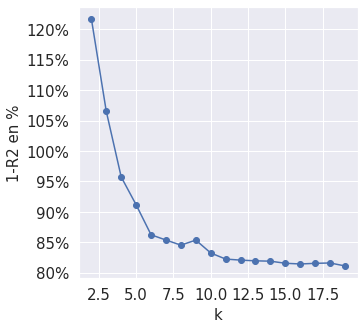

hyper parametre k optimal : 19
erreur minimale :  81.12068308992777


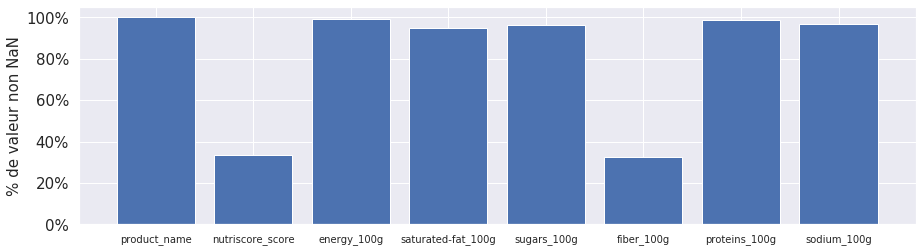

(3,)
colfit :  ['proteins_100g']
dataScaledTrain.shape[0] 851462


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 274
851462


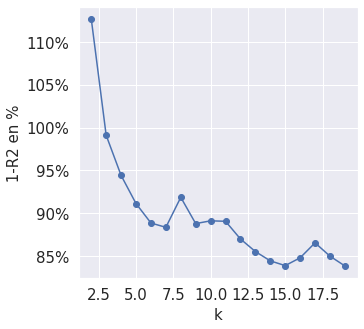

hyper parametre k optimal : 19
erreur minimale :  83.81384855211125


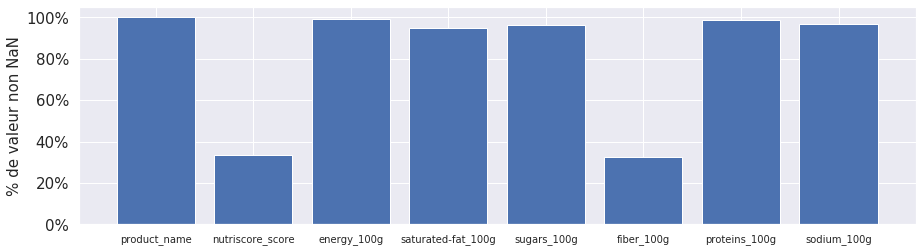

(4,)
colfit :  ['sodium_100g']
dataScaledTrain.shape[0] 829255


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 8636
829255


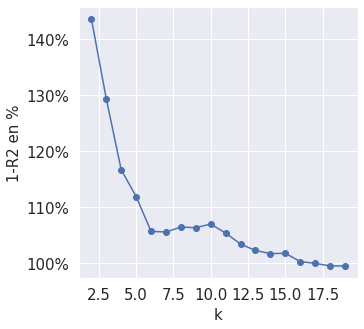

hyper parametre k optimal : 19
erreur minimale :  99.49868022770076


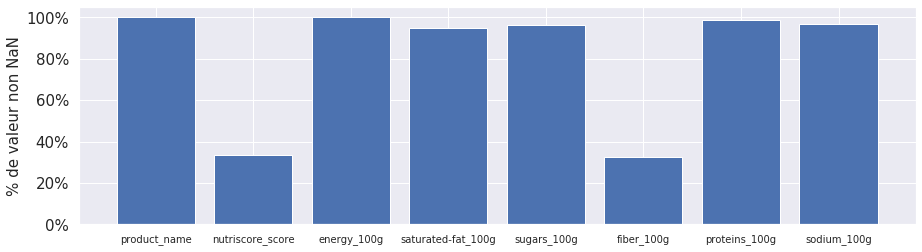

In [8]:
colTarget=['energy_100g']

colfit = ["saturated-fat_100g","sugars_100g","fiber_100g","proteins_100g","sodium_100g"]
# "energy_100g", "saturated-fat_100g","sugars_100g","fiber_100g","proteins_100g","sodium_100g"

knnData(colTarget, colfit, 200000)


colfit =np.array(colfit)

comb = combinations([0, 1, 2, 3, 4], 4) 
for i in list(comb): 
    print(i )
    print("colfit : ", list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)

    
comb = combinations([0, 1, 2, 3, 4], 3) 
for i in list(comb): 
    print(i )
    print("colfit : ",list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)

comb = combinations([0, 1, 2, 3, 4], 2) 
for i in list(comb): 
    print(i )
    print("colfit : ", list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)
    
comb = combinations([0, 1, 2, 3, 4], 1) 
for i in list(comb): 
    print(i )
    print("colfit : ", list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)
    


## KNN sugars_100g


dataScaledTrain.shape[0] 269743
dataScaledPredicted.shape[0] 1593
269743


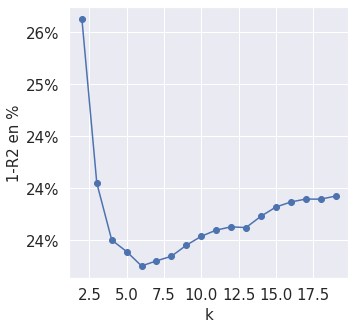

hyper parametre k optimal : 6
erreur minimale :  23.25294414958492


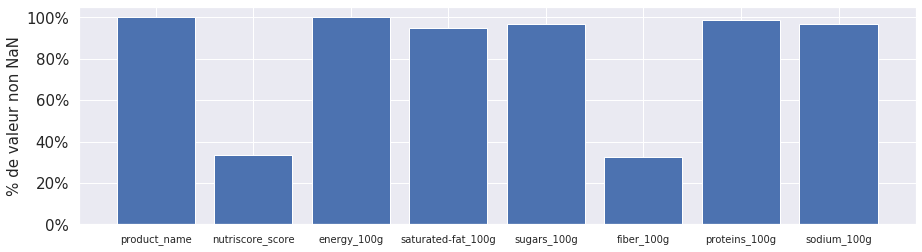

(0, 1, 2, 3)
colfit :  ['energy_100g', 'saturated-fat_100g', 'fiber_100g', 'proteins_100g']
dataScaledTrain.shape[0] 273798
dataScaledPredicted.shape[0] 233
273798


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


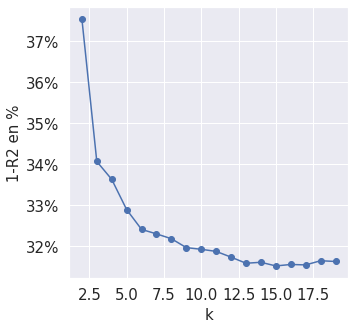

hyper parametre k optimal : 15
erreur minimale :  31.515571004200382


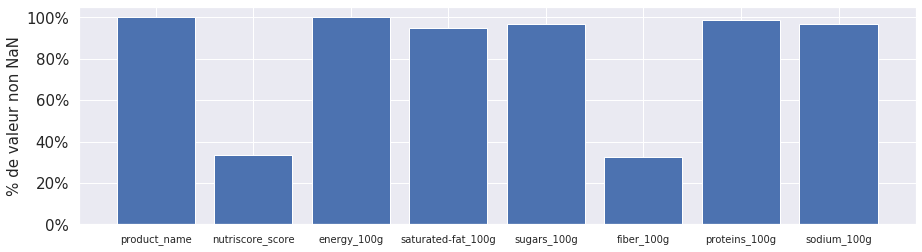

(0, 1, 2, 4)
colfit :  ['energy_100g', 'saturated-fat_100g', 'fiber_100g', 'sodium_100g']
dataScaledTrain.shape[0] 271786


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


dataScaledPredicted.shape[0] 206
271786


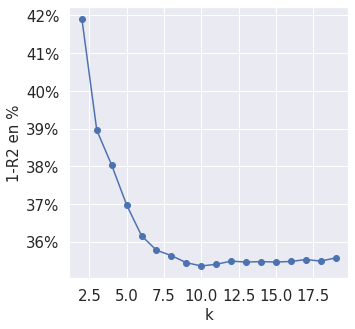

hyper parametre k optimal : 10
erreur minimale :  35.35924988027428


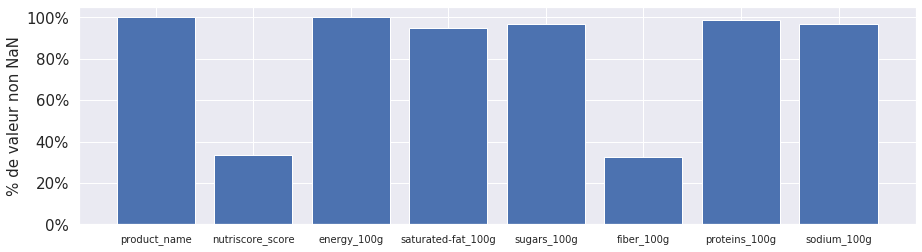

(0, 1, 3, 4)
colfit :  ['energy_100g', 'saturated-fat_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 794370


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


dataScaledPredicted.shape[0] 5814
794370


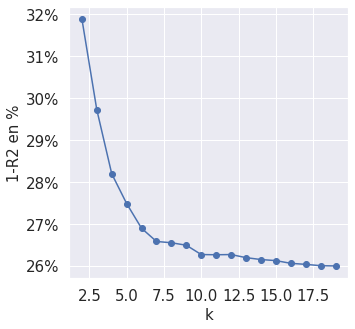

hyper parametre k optimal : 19
erreur minimale :  25.9949789911021


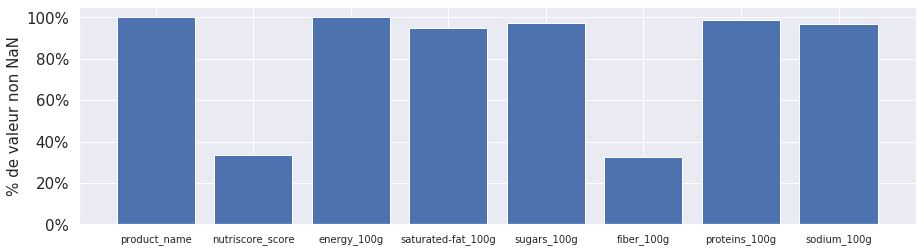

(0, 2, 3, 4)
colfit :  ['energy_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 274789
dataScaledPredicted.shape[0] 562
274789


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


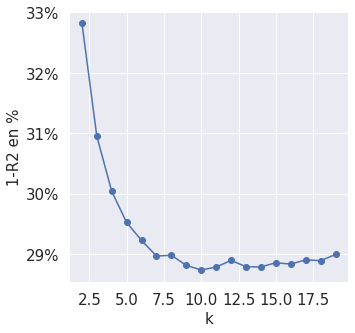

hyper parametre k optimal : 10
erreur minimale :  28.735246526793446


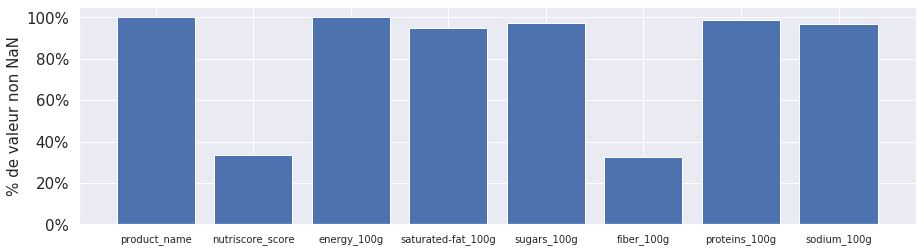

(1, 2, 3, 4)
colfit :  ['saturated-fat_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 271336
dataScaledPredicted.shape[0] 0
(0, 1, 2)
colfit :  ['energy_100g', 'saturated-fat_100g', 'fiber_100g']


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`

dataScaledTrain.shape[0] 274751
dataScaledPredicted.shape[0] 14
274751


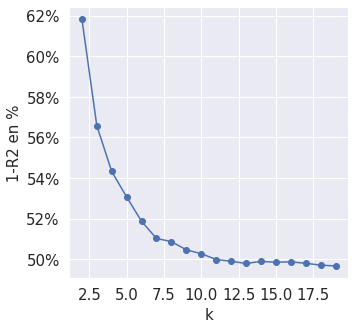

hyper parametre k optimal : 19
erreur minimale :  49.66972607608105


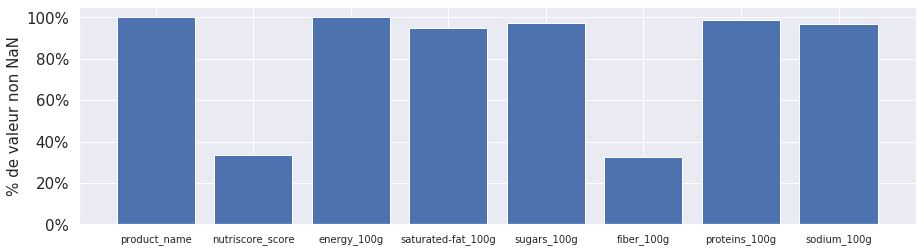

(0, 1, 3)
colfit :  ['energy_100g', 'saturated-fat_100g', 'proteins_100g']
dataScaledTrain.shape[0] 818001


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 516
818001


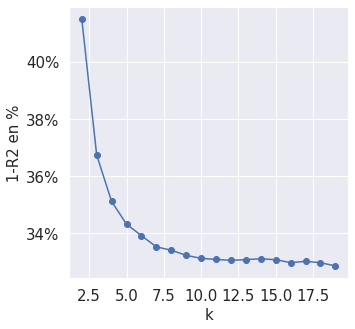

hyper parametre k optimal : 19
erreur minimale :  32.85591915313253


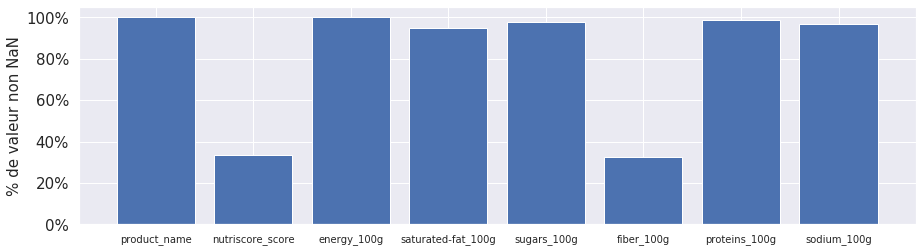

(0, 1, 4)
colfit :  ['energy_100g', 'saturated-fat_100g', 'sodium_100g']
dataScaledTrain.shape[0] 801299


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 150
801299


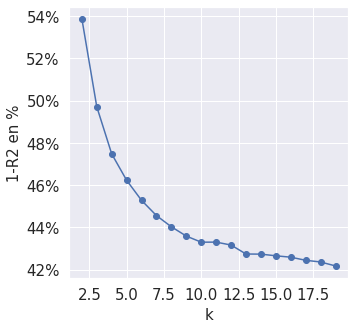

hyper parametre k optimal : 19
erreur minimale :  42.17961076284258


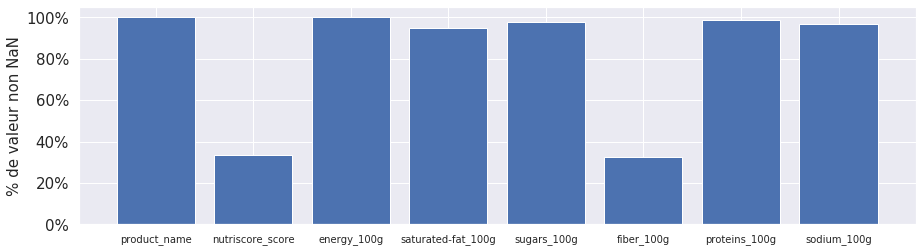

(0, 2, 3)
colfit :  ['energy_100g', 'fiber_100g', 'proteins_100g']
dataScaledTrain.shape[0] 278507
dataScaledPredicted.shape[0] 674
278507


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


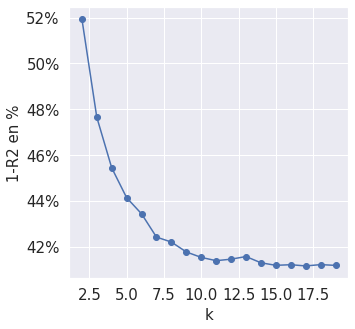

hyper parametre k optimal : 17
erreur minimale :  41.15063379755004


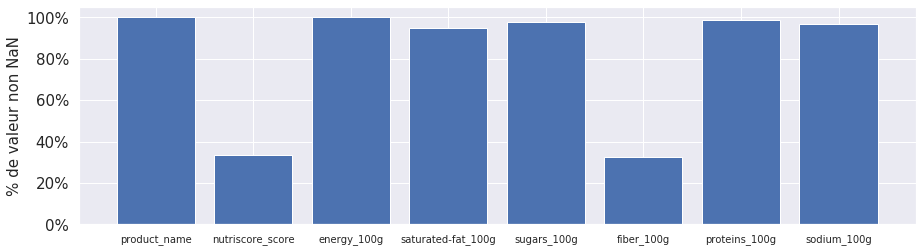

(0, 2, 4)
colfit :  ['energy_100g', 'fiber_100g', 'sodium_100g']
dataScaledTrain.shape[0] 276073


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 24
276073


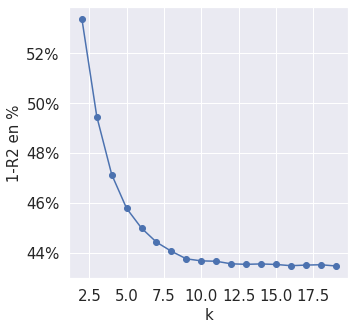

hyper parametre k optimal : 19
erreur minimale :  43.463309769593536


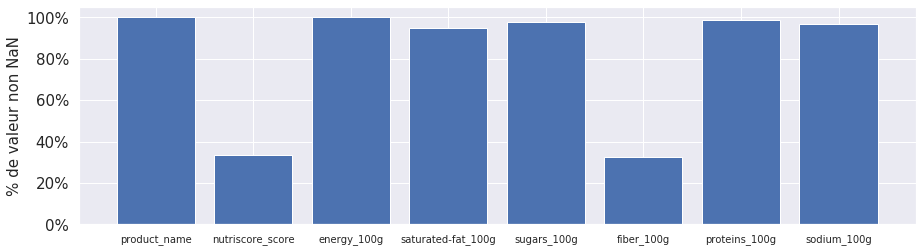

(0, 3, 4)
colfit :  ['energy_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 821460


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 5989
821460


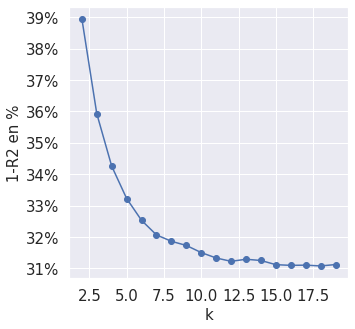

hyper parametre k optimal : 18
erreur minimale :  31.075090216121737


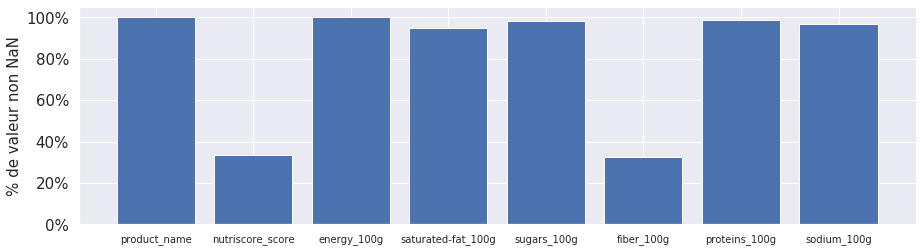

(1, 2, 3)
colfit :  ['saturated-fat_100g', 'fiber_100g', 'proteins_100g']
dataScaledTrain.shape[0] 274031
dataScaledPredicted.shape[0] 0
(1, 2, 4)
colfit :  ['saturated-fat_100g', 'fiber_100g', 'sodium_100g']


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledTrain.shape[0] 271992
dataScaledPredicted.shape[0] 0
(1, 3, 4)
colfit :  ['saturated-fat_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 800184
dataScaledPredicted.shape[0] 0
(2, 3, 4)
colfit :  ['fiber_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 275351
dataScaledPredicted.shape[0] 0
(0, 1)
colfit :  ['energy_100g', 'saturated-fat_100g']


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledTrain.shape[0] 820003
dataScaledPredicted.shape[0] 210
820003


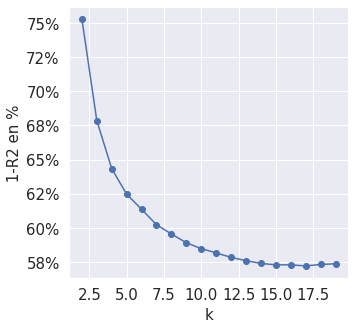

hyper parametre k optimal : 17
erreur minimale :  57.21518935427275


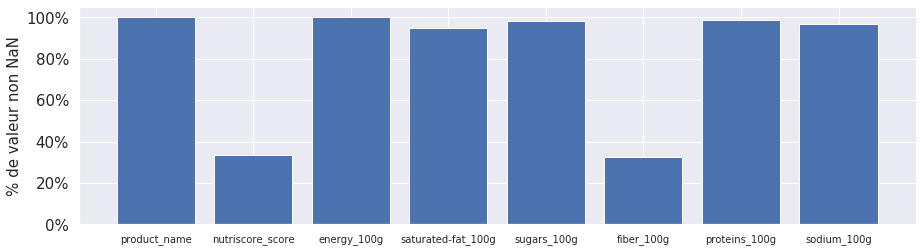

(0, 2)
colfit :  ['energy_100g', 'fiber_100g']
dataScaledTrain.shape[0] 280076
dataScaledPredicted.shape[0] 54
280076


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


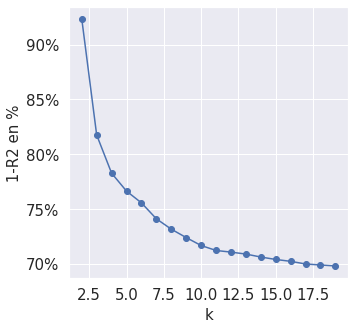

hyper parametre k optimal : 19
erreur minimale :  69.78709398326498


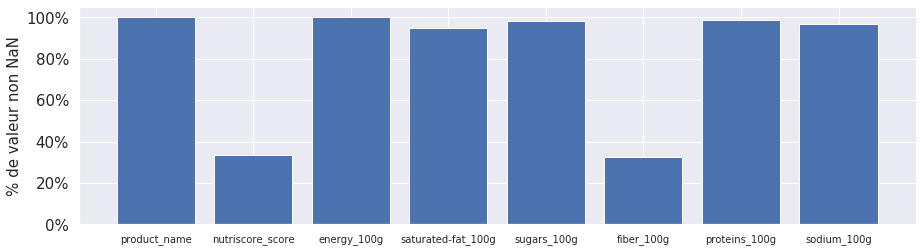

(0, 3)
colfit :  ['energy_100g', 'proteins_100g']
dataScaledTrain.shape[0] 847515


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 4221
847515


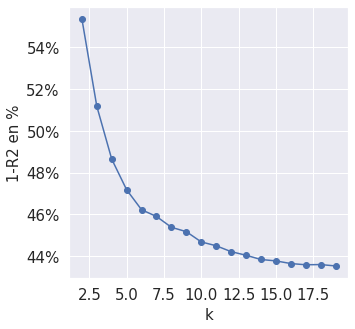

hyper parametre k optimal : 19
erreur minimale :  43.53590895033859


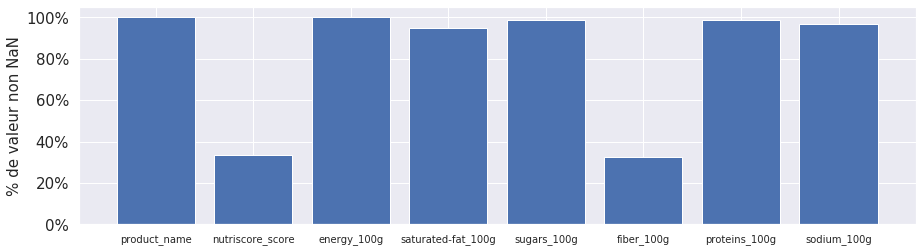

(0, 4)
colfit :  ['energy_100g', 'sodium_100g']
dataScaledTrain.shape[0] 829125


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 8766
829125


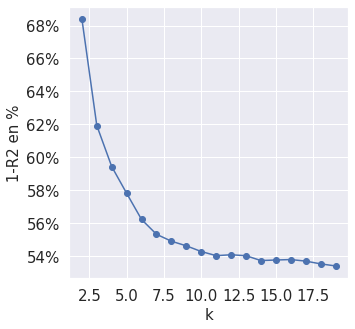

hyper parametre k optimal : 19
erreur minimale :  53.38491207652627


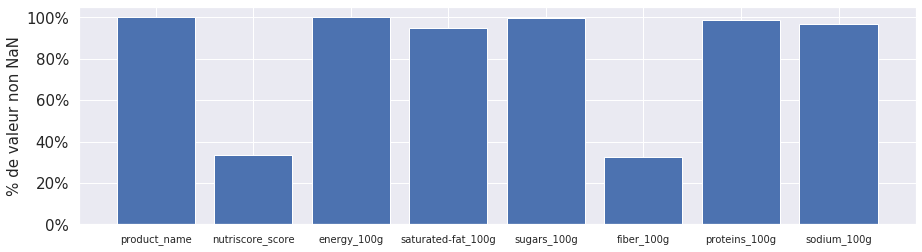

(1, 2)
colfit :  ['saturated-fat_100g', 'fiber_100g']
dataScaledTrain.shape[0] 274765
dataScaledPredicted.shape[0] 0
(1, 3)
colfit :  ['saturated-fat_100g', 'proteins_100g']


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledTrain.shape[0] 818517
dataScaledPredicted.shape[0] 0
(1, 4)
colfit :  ['saturated-fat_100g', 'sodium_100g']
dataScaledTrain.shape[0] 801449
dataScaledPredicted.shape[0] 0
(2, 3)
colfit :  ['fiber_100g', 'proteins_100g']
dataScaledTrain.shape[0] 279181
dataScaledPredicted.shape[0] 0
(2, 4)
colfit :  ['fiber_100g', 'sodium_100g']
dataScaledTrain.shape[0] 276097
dataScaledPredicted.shape[0] 0
(3, 4)
colfit :  ['proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 827449
dataScaledPredicted.shape[0] 0
(0,)
colfit :  ['energy_100g']
dataScaledTrain.shape[0] 863141


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 1280
863141


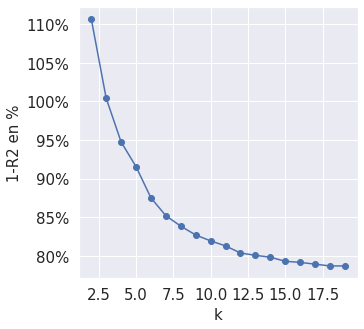

hyper parametre k optimal : 18
erreur minimale :  78.69517494314071


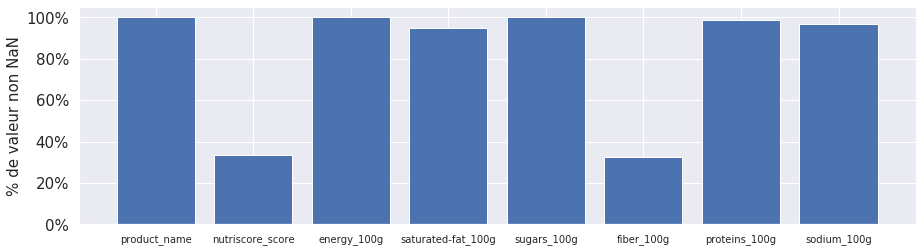

(1,)
colfit :  ['saturated-fat_100g']
dataScaledTrain.shape[0] 820213


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 0
(2,)
colfit :  ['fiber_100g']
dataScaledTrain.shape[0] 280130
dataScaledPredicted.shape[0] 0
(3,)
colfit :  ['proteins_100g']
dataScaledTrain.shape[0] 851736
dataScaledPredicted.shape[0] 0
(4,)
colfit :  ['sodium_100g']
dataScaledTrain.shape[0] 837891
dataScaledPredicted.shape[0] 0


In [9]:
colTarget=['sugars_100g']
colfit = ["energy_100g", "saturated-fat_100g","fiber_100g","proteins_100g","sodium_100g"]
# "energy_100g", "saturated-fat_100g","sugars_100g","fiber_100g","proteins_100g","sodium_100g"


knnData(colTarget, colfit, 200000)

colfit =np.array(colfit)

comb = combinations([0, 1, 2, 3, 4], 4) 
for i in list(comb): 
    print(i )
    print("colfit : ", list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)

    
comb = combinations([0, 1, 2, 3, 4], 3) 
for i in list(comb): 
    print(i )
    print("colfit : ",list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)

comb = combinations([0, 1, 2, 3, 4], 2) 
for i in list(comb): 
    print(i )
    print("colfit : ", list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)
    
comb = combinations([0, 1, 2, 3, 4], 1) 
for i in list(comb): 
    print(i )
    print("colfit : ", list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)


## KNN proteins_100g


dataScaledTrain.shape[0] 271336
dataScaledPredicted.shape[0] 656
271336


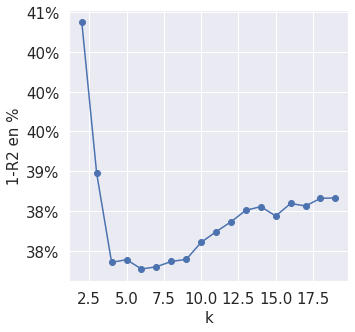

hyper parametre k optimal : 6
erreur minimale :  37.76985040083118


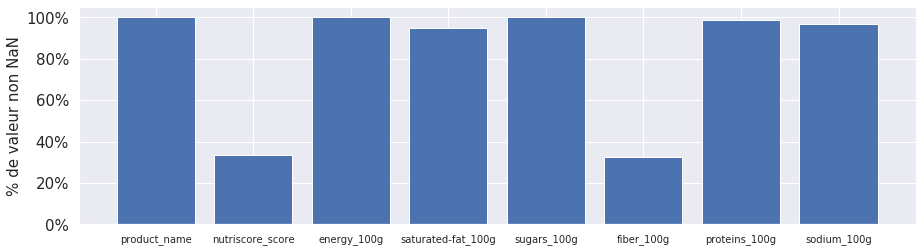

(0, 1, 2, 3)
colfit :  ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g']
dataScaledTrain.shape[0] 274687
dataScaledPredicted.shape[0] 78
274687


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


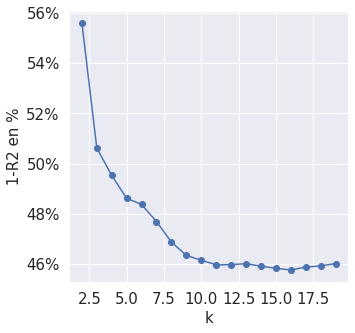

hyper parametre k optimal : 16
erreur minimale :  45.7677915755776


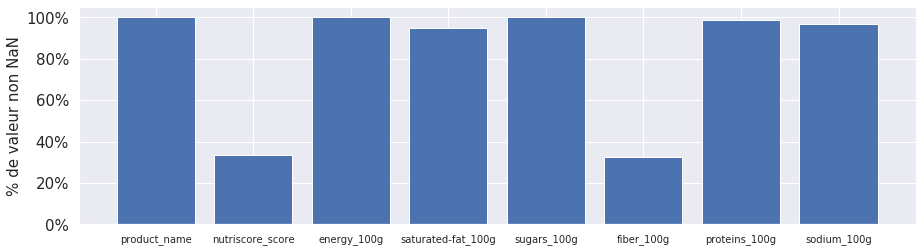

(0, 1, 2, 4)
colfit :  ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'sodium_100g']
dataScaledTrain.shape[0] 800840


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


dataScaledPredicted.shape[0] 609
800840


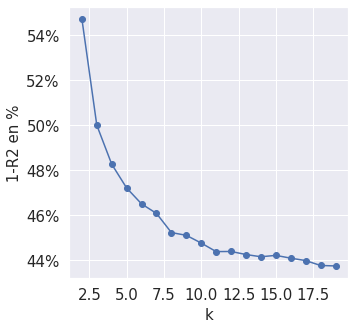

hyper parametre k optimal : 19
erreur minimale :  43.75431566156962


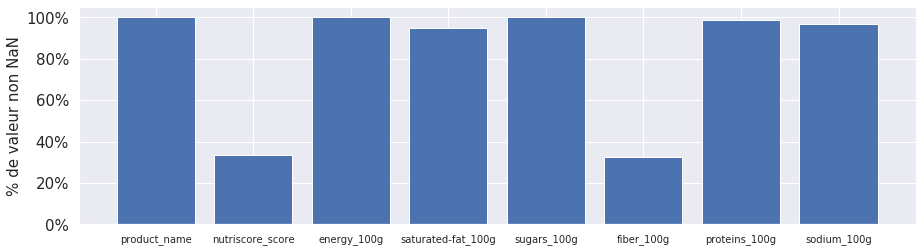

(0, 1, 3, 4)
colfit :  ['energy_100g', 'saturated-fat_100g', 'fiber_100g', 'sodium_100g']
dataScaledTrain.shape[0] 271992
dataScaledPredicted.shape[0] 0
(0, 2, 3, 4)
colfit :  ['energy_100g', 'sugars_100g', 'fiber_100g', 'sodium_100g']


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


dataScaledTrain.shape[0] 276007
dataScaledPredicted.shape[0] 90
276007


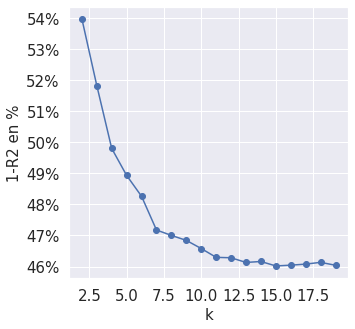

hyper parametre k optimal : 15
erreur minimale :  46.018317436475996


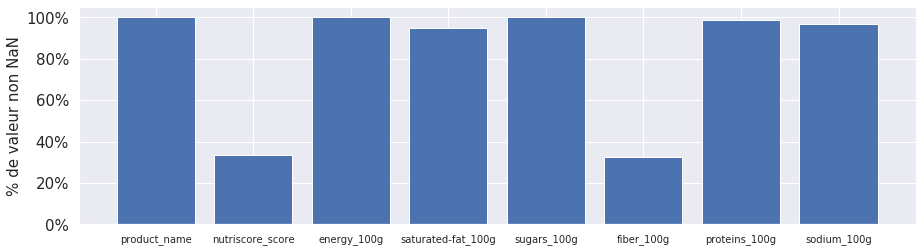

(1, 2, 3, 4)
colfit :  ['saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'sodium_100g']
dataScaledTrain.shape[0] 271992
dataScaledPredicted.shape[0] 0
(0, 1, 2)
colfit :  ['energy_100g', 'saturated-fat_100g', 'sugars_100g']


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`

dataScaledTrain.shape[0] 819860
dataScaledPredicted.shape[0] 353
819860


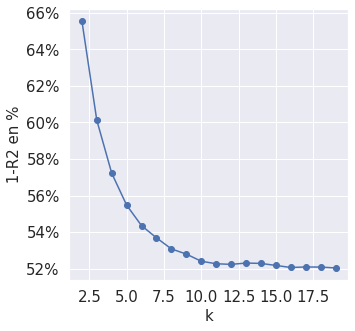

hyper parametre k optimal : 19
erreur minimale :  52.03439013679094


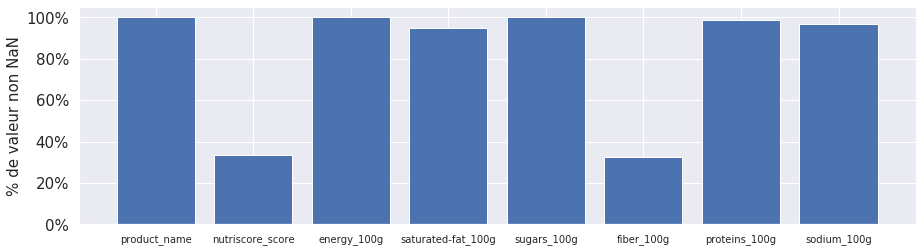

(0, 1, 3)
colfit :  ['energy_100g', 'saturated-fat_100g', 'fiber_100g']
dataScaledTrain.shape[0] 274765
dataScaledPredicted.shape[0] 0
(0, 1, 4)
colfit :  ['energy_100g', 'saturated-fat_100g', 'sodium_100g']


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledTrain.shape[0] 801449
dataScaledPredicted.shape[0] 0
(0, 2, 3)
colfit :  ['energy_100g', 'sugars_100g', 'fiber_100g']
dataScaledTrain.shape[0] 280005
dataScaledPredicted.shape[0] 125
280005


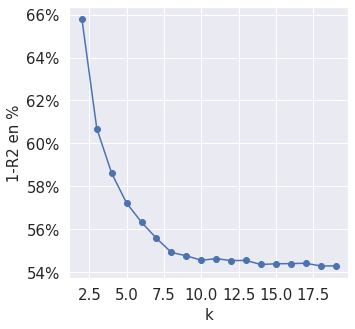

hyper parametre k optimal : 19
erreur minimale :  54.279504556456956


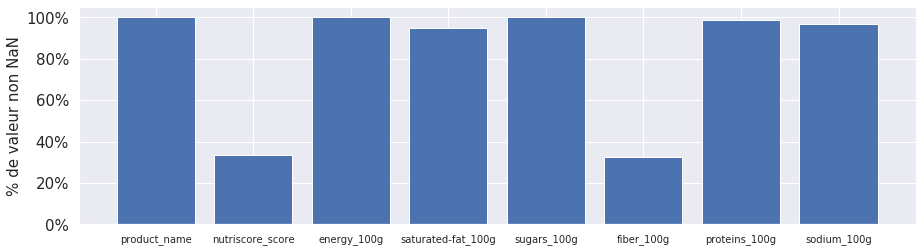

(0, 2, 4)
colfit :  ['energy_100g', 'sugars_100g', 'sodium_100g']
dataScaledTrain.shape[0] 828804


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 9087
828804


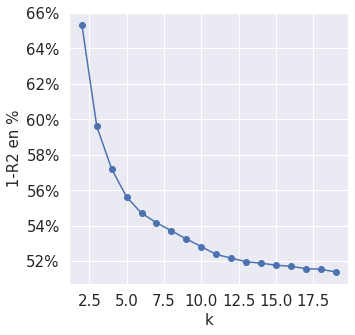

hyper parametre k optimal : 19
erreur minimale :  51.39544556529563


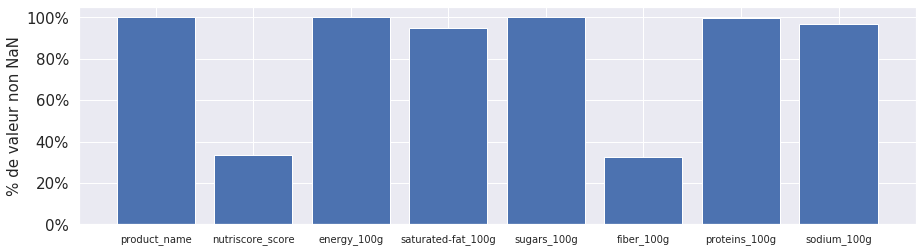

(0, 3, 4)
colfit :  ['energy_100g', 'fiber_100g', 'sodium_100g']
dataScaledTrain.shape[0] 276097
dataScaledPredicted.shape[0] 0
(1, 2, 3)
colfit :  ['saturated-fat_100g', 'sugars_100g', 'fiber_100g']


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledTrain.shape[0] 274765
dataScaledPredicted.shape[0] 0
(1, 2, 4)
colfit :  ['saturated-fat_100g', 'sugars_100g', 'sodium_100g']
dataScaledTrain.shape[0] 801449
dataScaledPredicted.shape[0] 0
(1, 3, 4)
colfit :  ['saturated-fat_100g', 'fiber_100g', 'sodium_100g']
dataScaledTrain.shape[0] 271992
dataScaledPredicted.shape[0] 0
(2, 3, 4)
colfit :  ['sugars_100g', 'fiber_100g', 'sodium_100g']
dataScaledTrain.shape[0] 276097
dataScaledPredicted.shape[0] 0
(0, 1)
colfit :  ['energy_100g', 'saturated-fat_100g']


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(0, 2)
colfit :  ['energy_100g', 'sugars_100g']
dataScaledTrain.shape[0] 862734
dataScaledPredicted.shape[0] 1687
862734


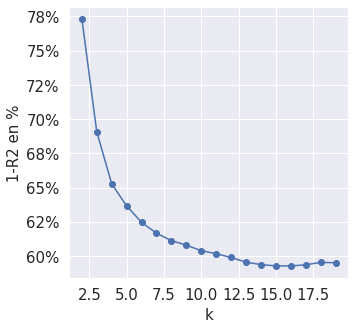

hyper parametre k optimal : 16
erreur minimale :  59.27262313468917


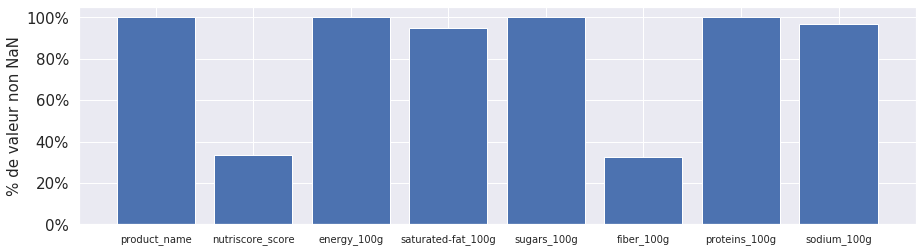

(0, 3)
colfit :  ['energy_100g', 'fiber_100g']
dataScaledTrain.shape[0] 280130


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 0
(0, 4)
colfit :  ['energy_100g', 'sodium_100g']
dataScaledTrain.shape[0] 837891
dataScaledPredicted.shape[0] 0
(1, 2)
colfit :  ['saturated-fat_100g', 'sugars_100g']
dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(1, 3)
colfit :  ['saturated-fat_100g', 'fiber_100g']
dataScaledTrain.shape[0] 274765
dataScaledPredicted.shape[0] 0
(1, 4)
colfit :  ['saturated-fat_100g', 'sodium_100g']
dataScaledTrain.shape[0] 801449
dataScaledPredicted.shape[0] 0
(2, 3)
colfit :  ['sugars_100g', 'fiber_100g']
dataScaledTrain.shape[0] 280130
dataScaledPredicted.shape[0] 0
(2, 4)
colfit :  ['sugars_100g', 'sodium_100g']
dataScaledTrain.shape[0] 837891
dataScaledPredicted.shape[0] 0
(3, 4)
colfit :  ['fiber_100g', 'sodium_100g']
dataScaledTrain.shape[0] 276097
dataScaledPredicted.shape[0] 0
(0,)
colfit :  ['energy_100g']


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(1,)
colfit :  ['saturated-fat_100g']
dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(2,)
colfit :  ['sugars_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(3,)
colfit :  ['fiber_100g']
dataScaledTrain.shape[0] 280130
dataScaledPredicted.shape[0] 0
(4,)
colfit :  ['sodium_100g']
dataScaledTrain.shape[0] 837891
dataScaledPredicted.shape[0] 0


In [10]:
colTarget=['proteins_100g']
colfit = ["energy_100g", "saturated-fat_100g","sugars_100g","fiber_100g","sodium_100g"]
# "energy_100g", "saturated-fat_100g","sugars_100g","fiber_100g","proteins_100g","sodium_100g"


knnData(colTarget, colfit, 200000)

colfit =np.array(colfit)

comb = combinations([0, 1, 2, 3, 4], 4) 
for i in list(comb): 
    print(i )
    print("colfit : ", list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)

    
comb = combinations([0, 1, 2, 3, 4], 3) 
for i in list(comb): 
    print(i )
    print("colfit : ",list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)

comb = combinations([0, 1, 2, 3, 4], 2) 
for i in list(comb): 
    print(i )
    print("colfit : ", list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)
    
comb = combinations([0, 1, 2, 3, 4], 1) 
for i in list(comb): 
    print(i )
    print("colfit : ", list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)


## KNN sodium_100g


dataScaledTrain.shape[0] 271992
dataScaledPredicted.shape[0] 2773
271992


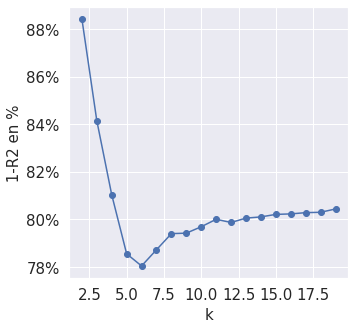

hyper parametre k optimal : 6
erreur minimale :  78.03678596404139


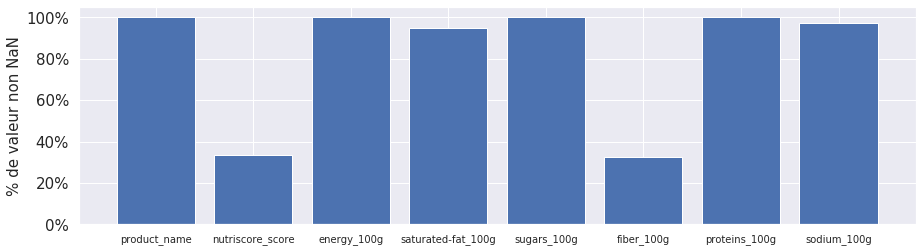

(0, 1, 2, 3)
colfit :  ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g']
dataScaledTrain.shape[0] 274765
dataScaledPredicted.shape[0] 0
(0, 1, 2, 4)
colfit :  ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g']


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


dataScaledTrain.shape[0] 804222
dataScaledPredicted.shape[0] 15991
804222


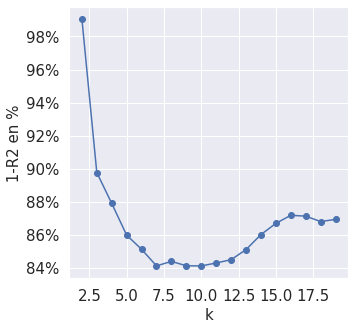

hyper parametre k optimal : 10
erreur minimale :  84.1062072513964


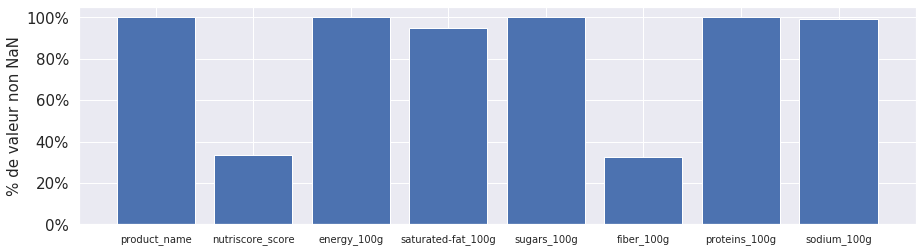

(0, 1, 3, 4)
colfit :  ['energy_100g', 'saturated-fat_100g', 'fiber_100g', 'proteins_100g']
dataScaledTrain.shape[0] 274765
dataScaledPredicted.shape[0] 0
(0, 2, 3, 4)
colfit :  ['energy_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g']


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


dataScaledTrain.shape[0] 278870
dataScaledPredicted.shape[0] 1260
278870


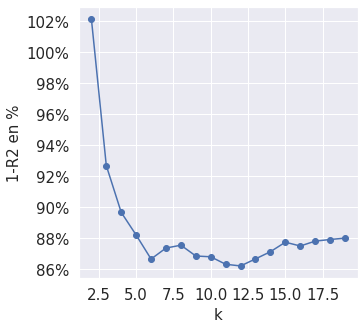

hyper parametre k optimal : 12
erreur minimale :  86.20610528643346


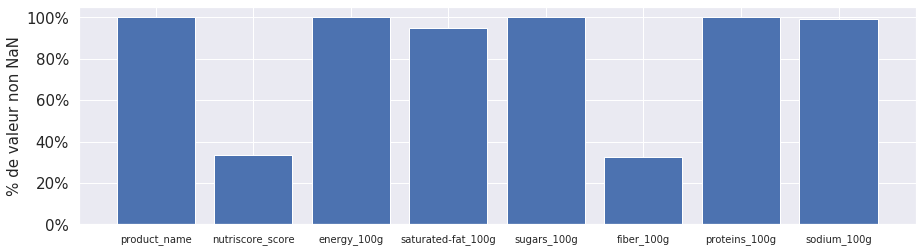

(1, 2, 3, 4)
colfit :  ['saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g']
dataScaledTrain.shape[0] 274765
dataScaledPredicted.shape[0] 0
(0, 1, 2)
colfit :  ['energy_100g', 'saturated-fat_100g', 'sugars_100g']


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`

dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(0, 1, 3)
colfit :  ['energy_100g', 'saturated-fat_100g', 'fiber_100g']
dataScaledTrain.shape[0] 274765
dataScaledPredicted.shape[0] 0
(0, 1, 4)
colfit :  ['energy_100g', 'saturated-fat_100g', 'proteins_100g']
dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(0, 2, 3)
colfit :  ['energy_100g', 'sugars_100g', 'fiber_100g']
dataScaledTrain.shape[0] 280130
dataScaledPredicted.shape[0] 0
(0, 2, 4)
colfit :  ['energy_100g', 'sugars_100g', 'proteins_100g']
dataScaledTrain.shape[0] 857915
dataScaledPredicted.shape[0] 6506
857915


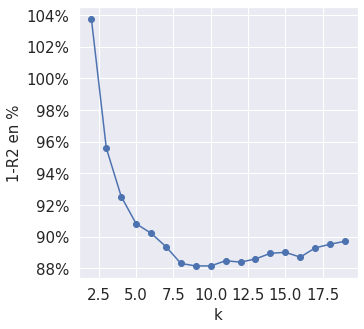

hyper parametre k optimal : 9
erreur minimale :  88.14969442562128


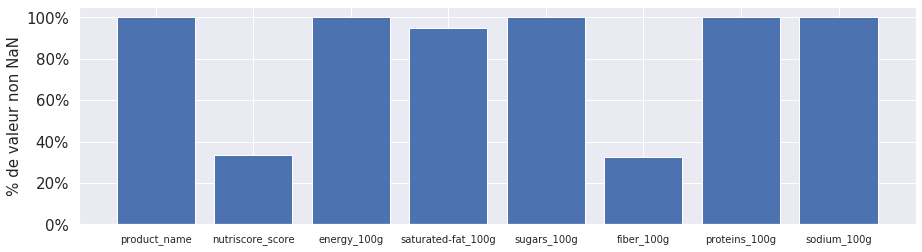

(0, 3, 4)
colfit :  ['energy_100g', 'fiber_100g', 'proteins_100g']
dataScaledTrain.shape[0] 280130
dataScaledPredicted.shape[0] 0
(1, 2, 3)
colfit :  ['saturated-fat_100g', 'sugars_100g', 'fiber_100g']


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledTrain.shape[0] 274765
dataScaledPredicted.shape[0] 0
(1, 2, 4)
colfit :  ['saturated-fat_100g', 'sugars_100g', 'proteins_100g']
dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(1, 3, 4)
colfit :  ['saturated-fat_100g', 'fiber_100g', 'proteins_100g']
dataScaledTrain.shape[0] 274765
dataScaledPredicted.shape[0] 0
(2, 3, 4)
colfit :  ['sugars_100g', 'fiber_100g', 'proteins_100g']
dataScaledTrain.shape[0] 280130
dataScaledPredicted.shape[0] 0
(0, 1)
colfit :  ['energy_100g', 'saturated-fat_100g']


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(0, 2)
colfit :  ['energy_100g', 'sugars_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(0, 3)
colfit :  ['energy_100g', 'fiber_100g']
dataScaledTrain.shape[0] 280130
dataScaledPredicted.shape[0] 0
(0, 4)
colfit :  ['energy_100g', 'proteins_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(1, 2)
colfit :  ['saturated-fat_100g', 'sugars_100g']
dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(1, 3)
colfit :  ['saturated-fat_100g', 'fiber_100g']
dataScaledTrain.shape[0] 274765
dataScaledPredicted.shape[0] 0
(1, 4)
colfit :  ['saturated-fat_100g', 'proteins_100g']
dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(2, 3)
colfit :  ['sugars_100g', 'fiber_100g']
dataScaledTrain.shape[0] 280130
dataScaledPredicted.shape[0] 0
(2, 4)
colfit :  ['sugars_100g', 'proteins_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(3, 4)
colfit :  ['fiber_

/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(1,)
colfit :  ['saturated-fat_100g']
dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(2,)
colfit :  ['sugars_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(3,)
colfit :  ['fiber_100g']
dataScaledTrain.shape[0] 280130
dataScaledPredicted.shape[0] 0
(4,)
colfit :  ['proteins_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0


In [11]:
colTarget=['sodium_100g']
colfit = ["energy_100g", "saturated-fat_100g","sugars_100g","fiber_100g","proteins_100g"]
# "energy_100g", "saturated-fat_100g","sugars_100g","fiber_100g","proteins_100g","sodium_100g"


knnData(colTarget, colfit, 200000)

colfit =np.array(colfit)

comb = combinations([0, 1, 2, 3, 4], 4) 
for i in list(comb): 
    print(i )
    print("colfit : ", list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)

    
comb = combinations([0, 1, 2, 3, 4], 3) 
for i in list(comb): 
    print(i )
    print("colfit : ",list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)

comb = combinations([0, 1, 2, 3, 4], 2) 
for i in list(comb): 
    print(i )
    print("colfit : ", list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)
    
comb = combinations([0, 1, 2, 3, 4], 1) 
for i in list(comb): 
    print(i )
    print("colfit : ", list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)


## KNN fiber

dataScaledTrain.shape[0] 274765
dataScaledPredicted.shape[0] 545448
274765


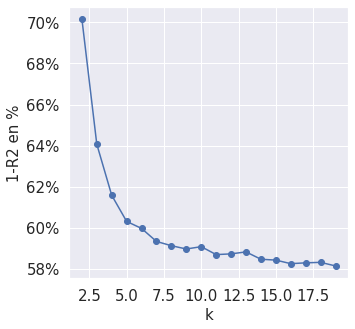

hyper parametre k optimal : 19
erreur minimale :  58.138233026895406


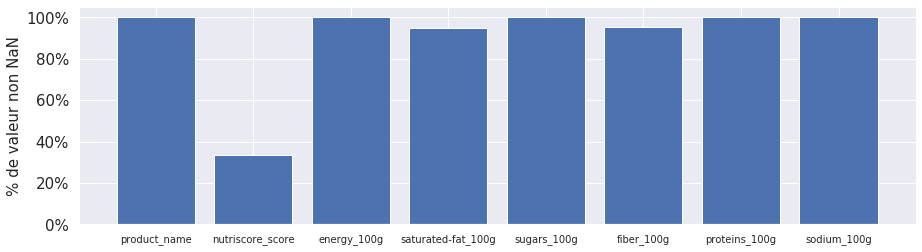

(0, 1, 2, 3)
colfit :  ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g']
dataScaledTrain.shape[0] 820213


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


dataScaledPredicted.shape[0] 0
(0, 1, 2, 4)
colfit :  ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'sodium_100g']
dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(0, 1, 3, 4)
colfit :  ['energy_100g', 'saturated-fat_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(0, 2, 3, 4)
colfit :  ['energy_100g', 'sugars_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 825578
dataScaledPredicted.shape[0] 38843
825578


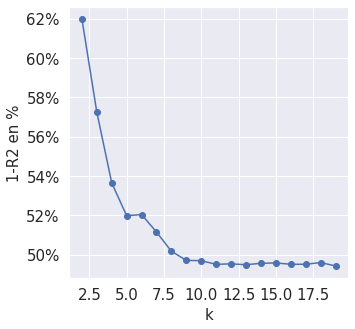

hyper parametre k optimal : 19
erreur minimale :  49.43324961825577


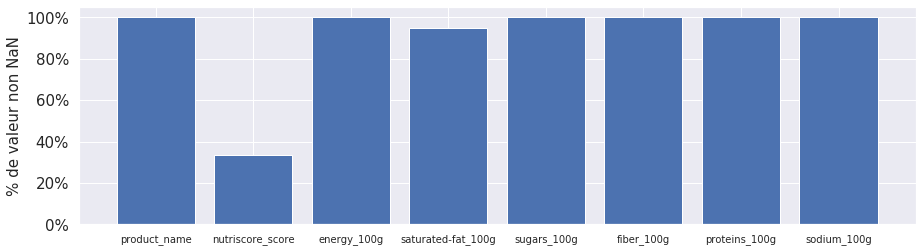

(1, 2, 3, 4)
colfit :  ['saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 820213


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


dataScaledPredicted.shape[0] 0
(0, 1, 2)
colfit :  ['energy_100g', 'saturated-fat_100g', 'sugars_100g']
dataScaledTrain.shape[0] 820213


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 0
(0, 1, 3)
colfit :  ['energy_100g', 'saturated-fat_100g', 'proteins_100g']
dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(0, 1, 4)
colfit :  ['energy_100g', 'saturated-fat_100g', 'sodium_100g']
dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(0, 2, 3)
colfit :  ['energy_100g', 'sugars_100g', 'proteins_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(0, 2, 4)
colfit :  ['energy_100g', 'sugars_100g', 'sodium_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(0, 3, 4)
colfit :  ['energy_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(1, 2, 3)
colfit :  ['saturated-fat_100g', 'sugars_100g', 'proteins_100g']
dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(1, 2, 4)
colfit :  ['saturated-fat_100g', 'sugars_100g', 'sodium_100g']
dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(1, 3, 4)
colfit :  ['saturate

/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 0
(0, 2)
colfit :  ['energy_100g', 'sugars_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(0, 3)
colfit :  ['energy_100g', 'proteins_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(0, 4)
colfit :  ['energy_100g', 'sodium_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(1, 2)
colfit :  ['saturated-fat_100g', 'sugars_100g']
dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(1, 3)
colfit :  ['saturated-fat_100g', 'proteins_100g']
dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(1, 4)
colfit :  ['saturated-fat_100g', 'sodium_100g']
dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(2, 3)
colfit :  ['sugars_100g', 'proteins_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(2, 4)
colfit :  ['sugars_100g', 'sodium_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(3, 4)
colfit :  ['proteins_100g', 'sodium_100g']
data

/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 0
(1,)
colfit :  ['saturated-fat_100g']
dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 0
(2,)
colfit :  ['sugars_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(3,)
colfit :  ['proteins_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(4,)
colfit :  ['sodium_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0


In [12]:
colTarget=['fiber_100g']

colfit = ["energy_100g", "saturated-fat_100g","sugars_100g","proteins_100g","sodium_100g"]
# "energy_100g", "saturated-fat_100g","sugars_100g","fiber_100g","proteins_100g","sodium_100g"

knnData(colTarget, colfit, 200000)


colfit =np.array(colfit)

comb = combinations([0, 1, 2, 3, 4], 4) 
for i in list(comb): 
    print(i )
    print("colfit : ", list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)

    
comb = combinations([0, 1, 2, 3, 4], 3) 
for i in list(comb): 
    print(i )
    print("colfit : ",list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)

comb = combinations([0, 1, 2, 3, 4], 2) 
for i in list(comb): 
    print(i )
    print("colfit : ", list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)
    
comb = combinations([0, 1, 2, 3, 4], 1) 
for i in list(comb): 
    print(i )
    print("colfit : ", list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)
    


## KNN fat

dataScaledTrain.shape[0] 820213
dataScaledPredicted.shape[0] 44208
820213


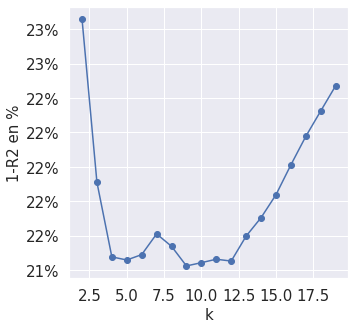

hyper parametre k optimal : 9
erreur minimale :  21.28066667055142


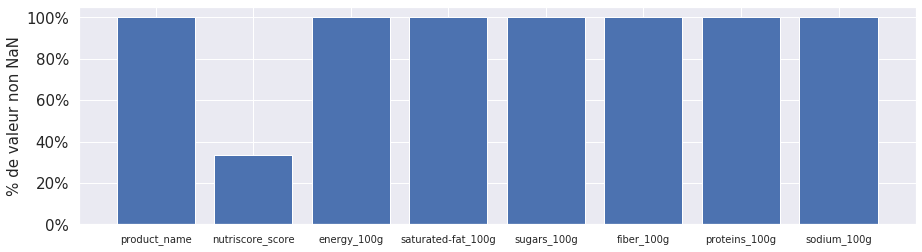

(0, 1, 2, 3)
colfit :  ['energy_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g']
dataScaledTrain.shape[0] 864421


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


dataScaledPredicted.shape[0] 0
(0, 1, 2, 4)
colfit :  ['energy_100g', 'sugars_100g', 'fiber_100g', 'sodium_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(0, 1, 3, 4)
colfit :  ['energy_100g', 'sugars_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(0, 2, 3, 4)
colfit :  ['energy_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(1, 2, 3, 4)
colfit :  ['sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(0, 1, 2)
colfit :  ['energy_100g', 'sugars_100g', 'fiber_100g']
dataScaledTrain.shape[0] 864421


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 0
(0, 1, 3)
colfit :  ['energy_100g', 'sugars_100g', 'proteins_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(0, 1, 4)
colfit :  ['energy_100g', 'sugars_100g', 'sodium_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(0, 2, 3)
colfit :  ['energy_100g', 'fiber_100g', 'proteins_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(0, 2, 4)
colfit :  ['energy_100g', 'fiber_100g', 'sodium_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(0, 3, 4)
colfit :  ['energy_100g', 'proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(1, 2, 3)
colfit :  ['sugars_100g', 'fiber_100g', 'proteins_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(1, 2, 4)
colfit :  ['sugars_100g', 'fiber_100g', 'sodium_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(1, 3, 4)
colfit :  ['sugars_100g', 'proteins_100g', 'sodium_1

/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 0
(0, 2)
colfit :  ['energy_100g', 'fiber_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(0, 3)
colfit :  ['energy_100g', 'proteins_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(0, 4)
colfit :  ['energy_100g', 'sodium_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(1, 2)
colfit :  ['sugars_100g', 'fiber_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(1, 3)
colfit :  ['sugars_100g', 'proteins_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(1, 4)
colfit :  ['sugars_100g', 'sodium_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(2, 3)
colfit :  ['fiber_100g', 'proteins_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(2, 4)
colfit :  ['fiber_100g', 'sodium_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(3, 4)
colfit :  ['proteins_100g', 'sodium_100g']
dataScaledTrain.shape[0] 8644

/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


dataScaledPredicted.shape[0] 0
(1,)
colfit :  ['sugars_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(2,)
colfit :  ['fiber_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(3,)
colfit :  ['proteins_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0
(4,)
colfit :  ['sodium_100g']
dataScaledTrain.shape[0] 864421
dataScaledPredicted.shape[0] 0


In [13]:
colTarget=['saturated-fat_100g']

colfit = ["energy_100g","sugars_100g","fiber_100g","proteins_100g","sodium_100g"]
# "energy_100g", "saturated-fat_100g","sugars_100g","fiber_100g","proteins_100g","sodium_100g"

knnData(colTarget, colfit, 200000)


colfit =np.array(colfit)

comb = combinations([0, 1, 2, 3, 4], 4) 
for i in list(comb): 
    print(i )
    print("colfit : ", list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)

    
comb = combinations([0, 1, 2, 3, 4], 3) 
for i in list(comb): 
    print(i )
    print("colfit : ",list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)

comb = combinations([0, 1, 2, 3, 4], 2) 
for i in list(comb): 
    print(i )
    print("colfit : ", list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)
    
comb = combinations([0, 1, 2, 3, 4], 1) 
for i in list(comb): 
    print(i )
    print("colfit : ", list(colfit[[i]]))
    knnData(colTarget, list(colfit[[i]]), 100000)
    


# Visualisation data Completed

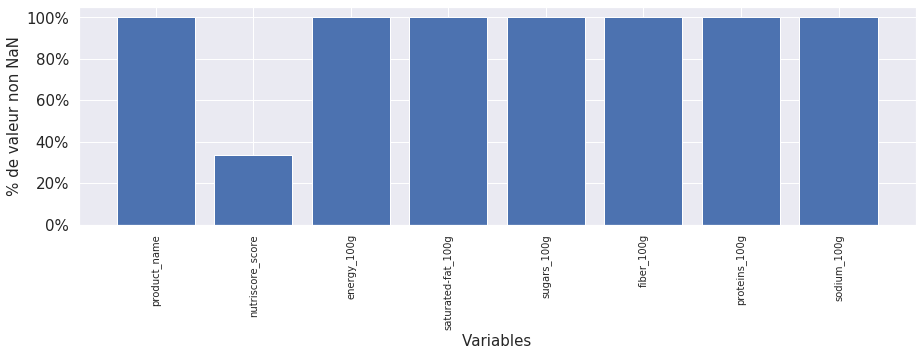

In [14]:
xlabel = dataScaled.columns
fig = plt.figure(figsize=(15, 4))
plot = fig.add_subplot(1, 1, 1)
plt.bar(xlabel, 100*dataScaled.count()/dataScaled.shape[0])
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=15)


fmt = '%.0f%%'  # Format you want the ticks, e.g. '40%'
xxticks = mtick.FormatStrFormatter(fmt)

# yaxis

plot.yaxis.set_major_formatter(xxticks)

plt.xlabel("Variables", fontsize=15)
plt.ylabel("% de valeur non NaN", fontsize=15)


plt.show()

# Sauvegarde csv

In [15]:
dataCompleted = dataScaled.copy()

dataCompleted.loc[:, "energy_100g":"sodium_100g"] = scaler.inverse_transform(dataScaled.loc[:, "energy_100g":"sodium_100g"].values)


dataCompleted.to_csv('donneeCompleted.csv', sep='\t', encoding='utf-8')
dataCompleted

,product_name,nutriscore_score,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g
0,Vitória crackers,NaN,1569.000000,3.08,15.000000,2.530000,7.800000,0.560000
3,moutarde au moût de raisin,18.0,936.000000,2.20,22.000000,0.000000,5.100000,1.811024
5,Sauce Sweety chili 0%,NaN,88.000000,0.00,0.400000,1.675263,0.200000,0.816000
6,Mini coco,NaN,251.000000,1.00,3.000000,1.578947,2.000000,0.460000
10,Sachet calisson,NaN,1104.859113,0.09,53.481053,4.550166,1.073684,0.000000
...,...,...,...,...,...,...,...,...
1113270,Riz parfumé,0.0,1469.000000,0.00,0.000000,1.331579,7.000000,0.000000
1113273,Boules,NaN,1556.000000,1.30,54.000000,4.205263,6.300000,0.008000
1113274,Minis beignets,15.0,1393.000000,6.00,10.400000,3.166316,7.400000,0.440000
1113275,Erdbeerkuchen 1019g tiefgefroren,12.0,925.000000,4.80,24.000000,0.368421,2.600000,0.112000
